<a href="https://colab.research.google.com/github/HMRLKE/probe_wrapper/blob/main/november_preliminaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
%cd drive/MyDrive/deptree


/content/drive/MyDrive/deptree


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
from collections import defaultdict
import seaborn as sns
import warnings


#sns.set_palette(sns.color_palette("Set2")[::2])
#with sns.set_context("paper", font_scale=1.5):

heatmap_cmap = "GnBu"

barplot_kws = dict(linewidth=0.5, edgecolor="black", palette="Paired")
bar_4x4_kwargs = barplot_kws.copy()
bar_4x4_kwargs['ci'] = 'sd'
bar_4x4_kwargs['capsize'] = 0.11

column_names = ['task', 'language', 'accuracy']

unperturbed = pd.read_csv('20231105_preliminaries/train/unperturbed.tsv', sep='\t', header=None)
perturbed = pd.read_csv('20231105_preliminaries/train/perturbed.tsv', sep='\t', header=None)
#combined_data
comb_tar_perturbed = pd.read_csv('20231105_preliminaries/target_plus_perturbed_combined.tsv', sep='\t', header=None)
#comb_unperturbed = pd.read_csv('20231105_preliminaries/unperturbed_combined_data.tsv', sep='\t', header=None)

unperturbed.columns = perturbed.columns = comb_tar_perturbed.columns = column_names
# Find nearly duplicate rows and calculate the average accuracy
def unique_avg_rows(df):
  merged_duplicates = pd.DataFrame(columns=column_names)
  duplicates = df.groupby(['task', 'language'])['accuracy'].mean().reset_index()
  for (task, language), group in duplicates.groupby(['task', 'language']):
    merged_row = [task, language, group['accuracy'].mean()]
    merged_duplicates = merged_duplicates.append(pd.Series(merged_row, index=column_names), ignore_index=True)
  return merged_duplicates

dedup_unperturbed = unique_avg_rows(unperturbed)
dedup_perturbed = unique_avg_rows(perturbed)
dedup_tar_perturbed = unique_avg_rows(comb_tar_perturbed)
#dedup_comb_unperturbed = unique_avg_rows(comb_unperturbed)

           task    language  accuracy_unperturbed  accuracy_perturbed
0      case_adj     Arabic               0.887306            0.906897
1      case_adj   Croatian               0.995754            0.992430
2      case_adj      Czech               0.993513            0.991976
3      case_adj   Estonian               0.980000            0.989247
4      case_adj    Finnish               0.985265            0.982845
..          ...         ...                   ...                 ...
228  tense_verb    Russian               0.931784            0.925860
229  tense_verb     Slovak               0.994750            0.995951
230  tense_verb    Spanish               0.982000            0.985861
231  tense_verb    Swedish               0.994000            0.996731
232  tense_verb  Ukrainian               0.957271            0.958798

[233 rows x 4 columns]
       language         accuracy_type  accuracy
0       Arabic   accuracy_unperturbed  0.887306
1     Croatian   accuracy_unperturbed  0

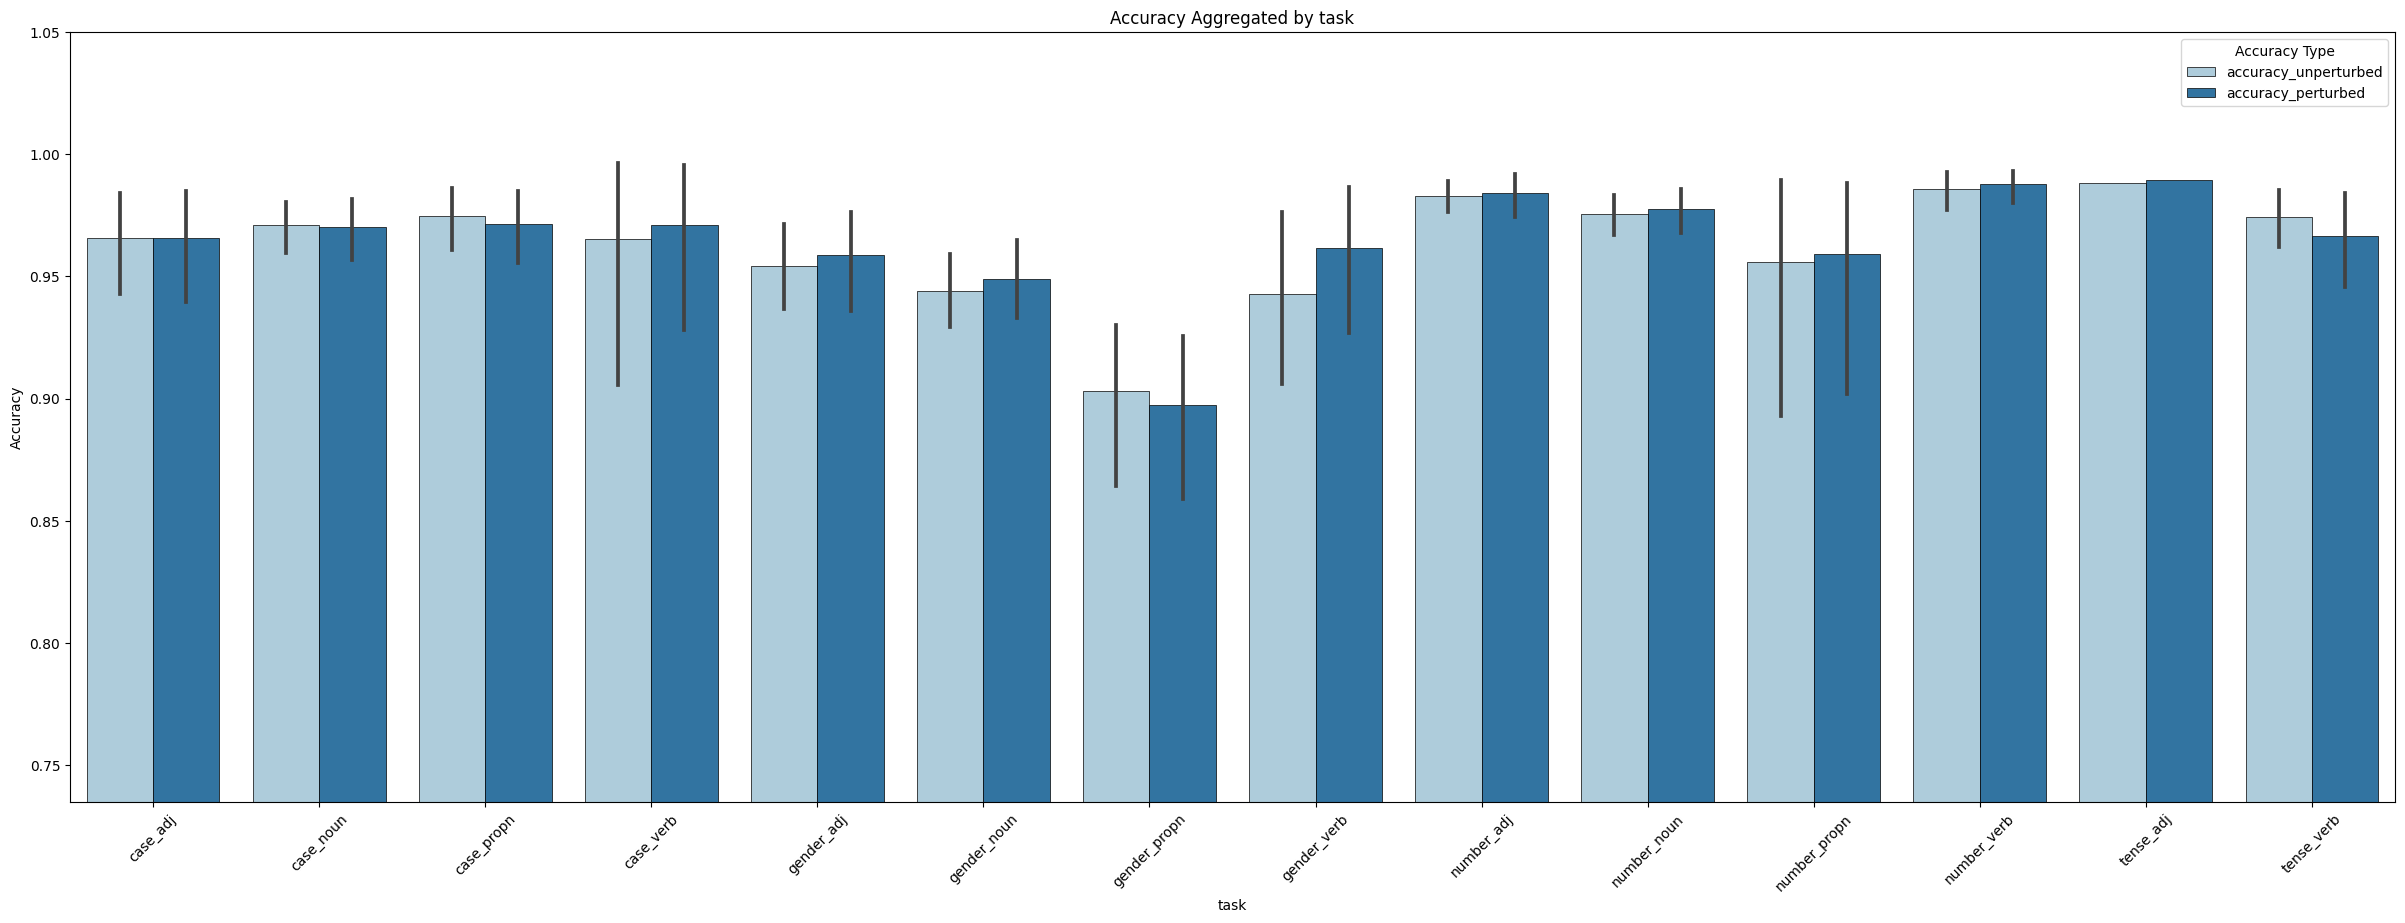

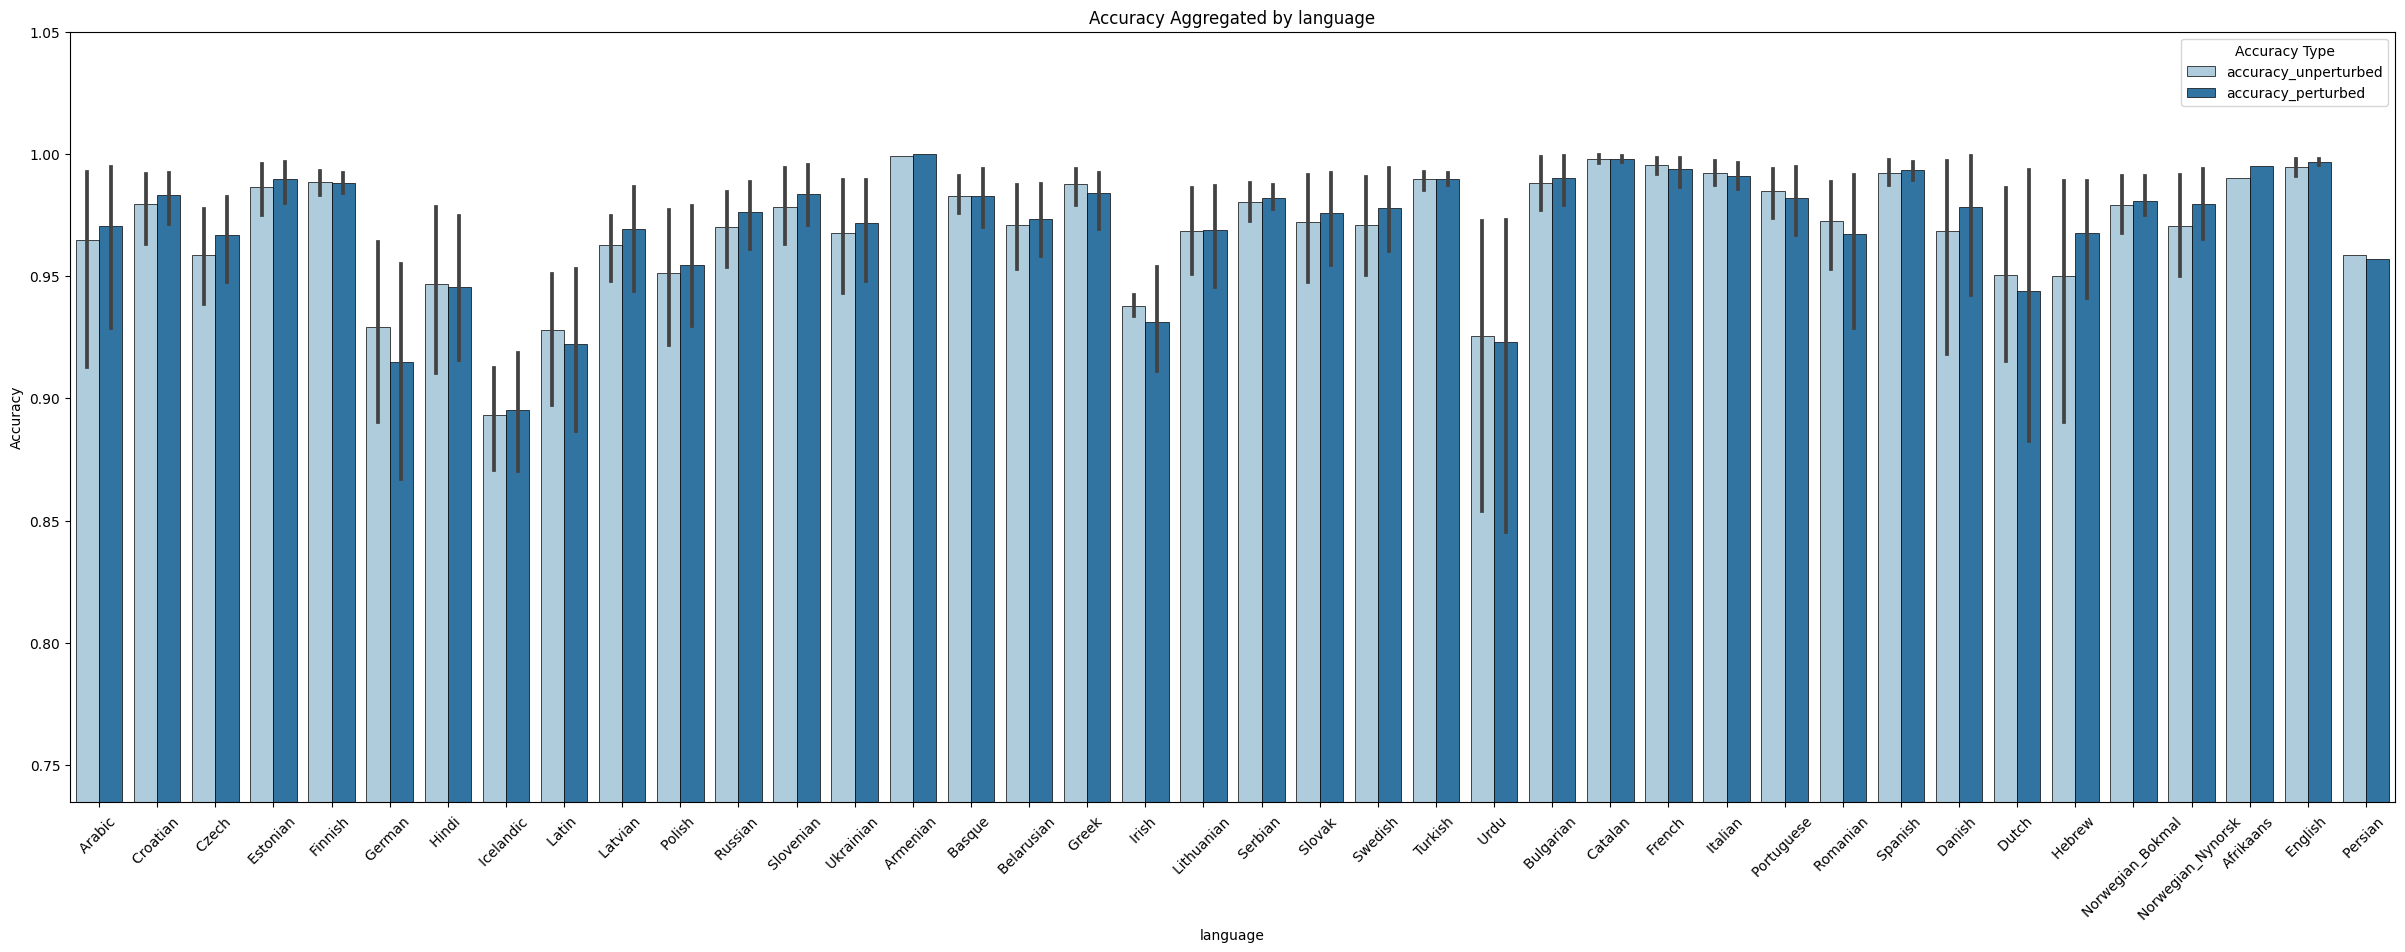

           task    language  accuracy_unperturbed  accuracy_perturbed  \
0      case_adj     Arabic               0.887306            0.906897   
1      case_adj   Croatian               0.995754            0.992430   
2      case_adj      Czech               0.993513            0.991976   
3      case_adj   Estonian               0.980000            0.989247   
4      case_adj    Finnish               0.985265            0.982845   
..          ...         ...                   ...                 ...   
228  tense_verb    Russian               0.931784            0.925860   
229  tense_verb     Slovak               0.994750            0.995951   
230  tense_verb    Spanish               0.982000            0.985861   
231  tense_verb    Swedish               0.994000            0.996731   
232  tense_verb  Ukrainian               0.957271            0.958798   

       Effect  
0   -2.207829  
1    0.333844  
2    0.154666  
3   -0.943603  
4    0.245604  
..        ...  
228  0.6358

In [ ]:


#print(len(unperturbed),len(perturbed),len(dedup_perturbed),len(dedup_unperturbed))

merged_df = pd.merge(dedup_unperturbed, dedup_tar_perturbed, on=['task', 'language'], suffixes=('_unperturbed', '_perturbed'))

#merged_df = pd.merge(merged_df, dedup_tar_perturbed, on=['task', 'language'], suffixes=('', '_tar'))
aggregations = ['task', 'language']
print(merged_df)
melted_df = pd.melt(merged_df, id_vars=['language'], value_vars=['accuracy_unperturbed', 'accuracy_perturbed'], var_name='accuracy_type', value_name='accuracy')
print(melted_df)
for aggregation in aggregations:
  plt.figure(figsize=(30, 10))
  ax = sns.barplot(x=aggregation, y="value", hue="variable", data=pd.melt(merged_df, id_vars=[aggregation], value_vars=['accuracy_unperturbed', 'accuracy_perturbed']),**barplot_kws,)
  ax.set_xlabel(aggregation)
  ax.set_ylabel('Accuracy')
  ax.set_ylim(0.735, 1.05)
  ax.set_title(f'Accuracy Aggregated by {aggregation}')
  ax.legend(title="Accuracy Type")
  plt.xticks(rotation=45)
  plt.show()

# Calculate the 'Effect' column
merged_df['Effect'] = (1 - (merged_df['accuracy_perturbed'] / merged_df['accuracy_unperturbed']))*100
print(merged_df)


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
print(merged_df['Effect'].mean())


-0.15174000489013909


       language         accuracy_type  accuracy
0       Arabic   accuracy_unperturbed  0.887306
1     Croatian   accuracy_unperturbed  0.995754
2        Czech   accuracy_unperturbed  0.993513
3     Estonian   accuracy_unperturbed  0.980000
4      Finnish   accuracy_unperturbed  0.985265
..          ...                   ...       ...
461    Russian     accuracy_perturbed  0.925860
462     Slovak     accuracy_perturbed  0.995951
463    Spanish     accuracy_perturbed  0.985861
464    Swedish     accuracy_perturbed  0.996731
465  Ukrainian     accuracy_perturbed  0.958798

[466 rows x 3 columns]


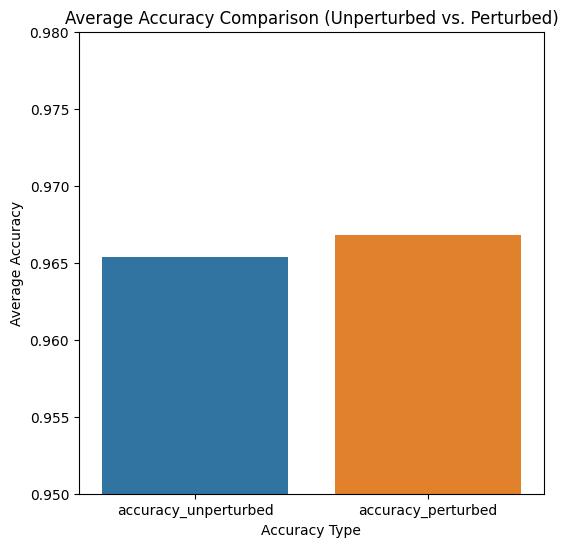

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
print(merged_df)

# Create a DataFrame from the sample data
merged_df = melted_df

import seaborn as sns
import matplotlib.pyplot as plt

# Create a Seaborn bar plot for comparing average accuracies
plt.figure(figsize=(6, 6))
ax = sns.barplot(x='accuracy_type', y='accuracy', data=melted_df, ci=None)
ax.axhline(y=0.723, color='gray', linestyle='--', label='RandomBERT baseline')
ax.set_ylim(0.95, 0.98)
# Add labels and title
plt.xlabel('Accuracy Type')
plt.ylabel('Average Accuracy')
plt.title('Average Accuracy Comparison (Unperturbed vs. Perturbed)')

plt.show()



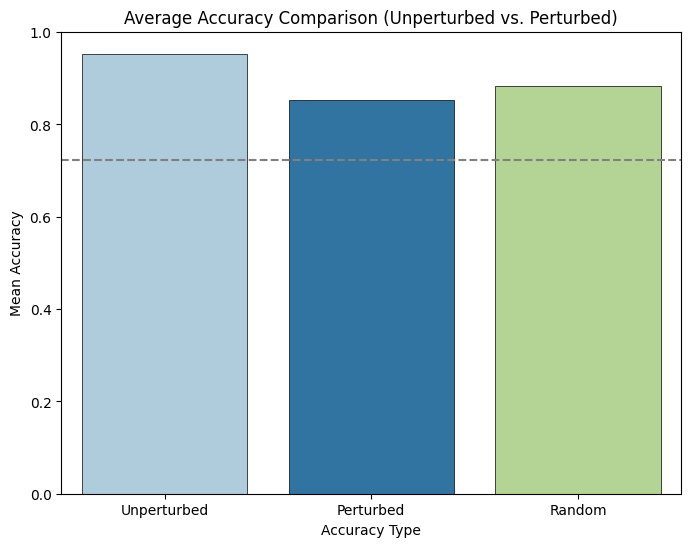

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
data = {'task': ['A', 'B', 'C'],
        'accuracy_unperturbed': [0.95, 0.92, 0.99],
        'accuracy_perturbed': [0.82, 0.89, 0.85],
        'accuracy_random': [0.87, 0.91, 0.87]}

# Create a DataFrame from the sample data
merged_df = pd.DataFrame(data)

# Calculate the means for both columns
average_accuracy_unperturbed = merged_df['accuracy_unperturbed'].mean()
average_accuracy_perturbed = merged_df['accuracy_perturbed'].mean()
average_accuracy_random = merged_df['accuracy_random'].mean()

# Create a bar plot for the averages
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=['Unperturbed', 'Perturbed', 'Random'], y=[merged_df['accuracy_unperturbed'].mean(), merged_df['accuracy_perturbed'].mean(), merged_df['accuracy_random'].mean()],**barplot_kws,)
ax.axhline(y=0.723, color='gray', linestyle='--', label='RandomBERT baseline')


# Add labels and title
plt.xlabel('Accuracy Type')
plt.ylabel('Mean Accuracy')
plt.title('Average Accuracy Comparison (Unperturbed vs. Perturbed)')

plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encounter

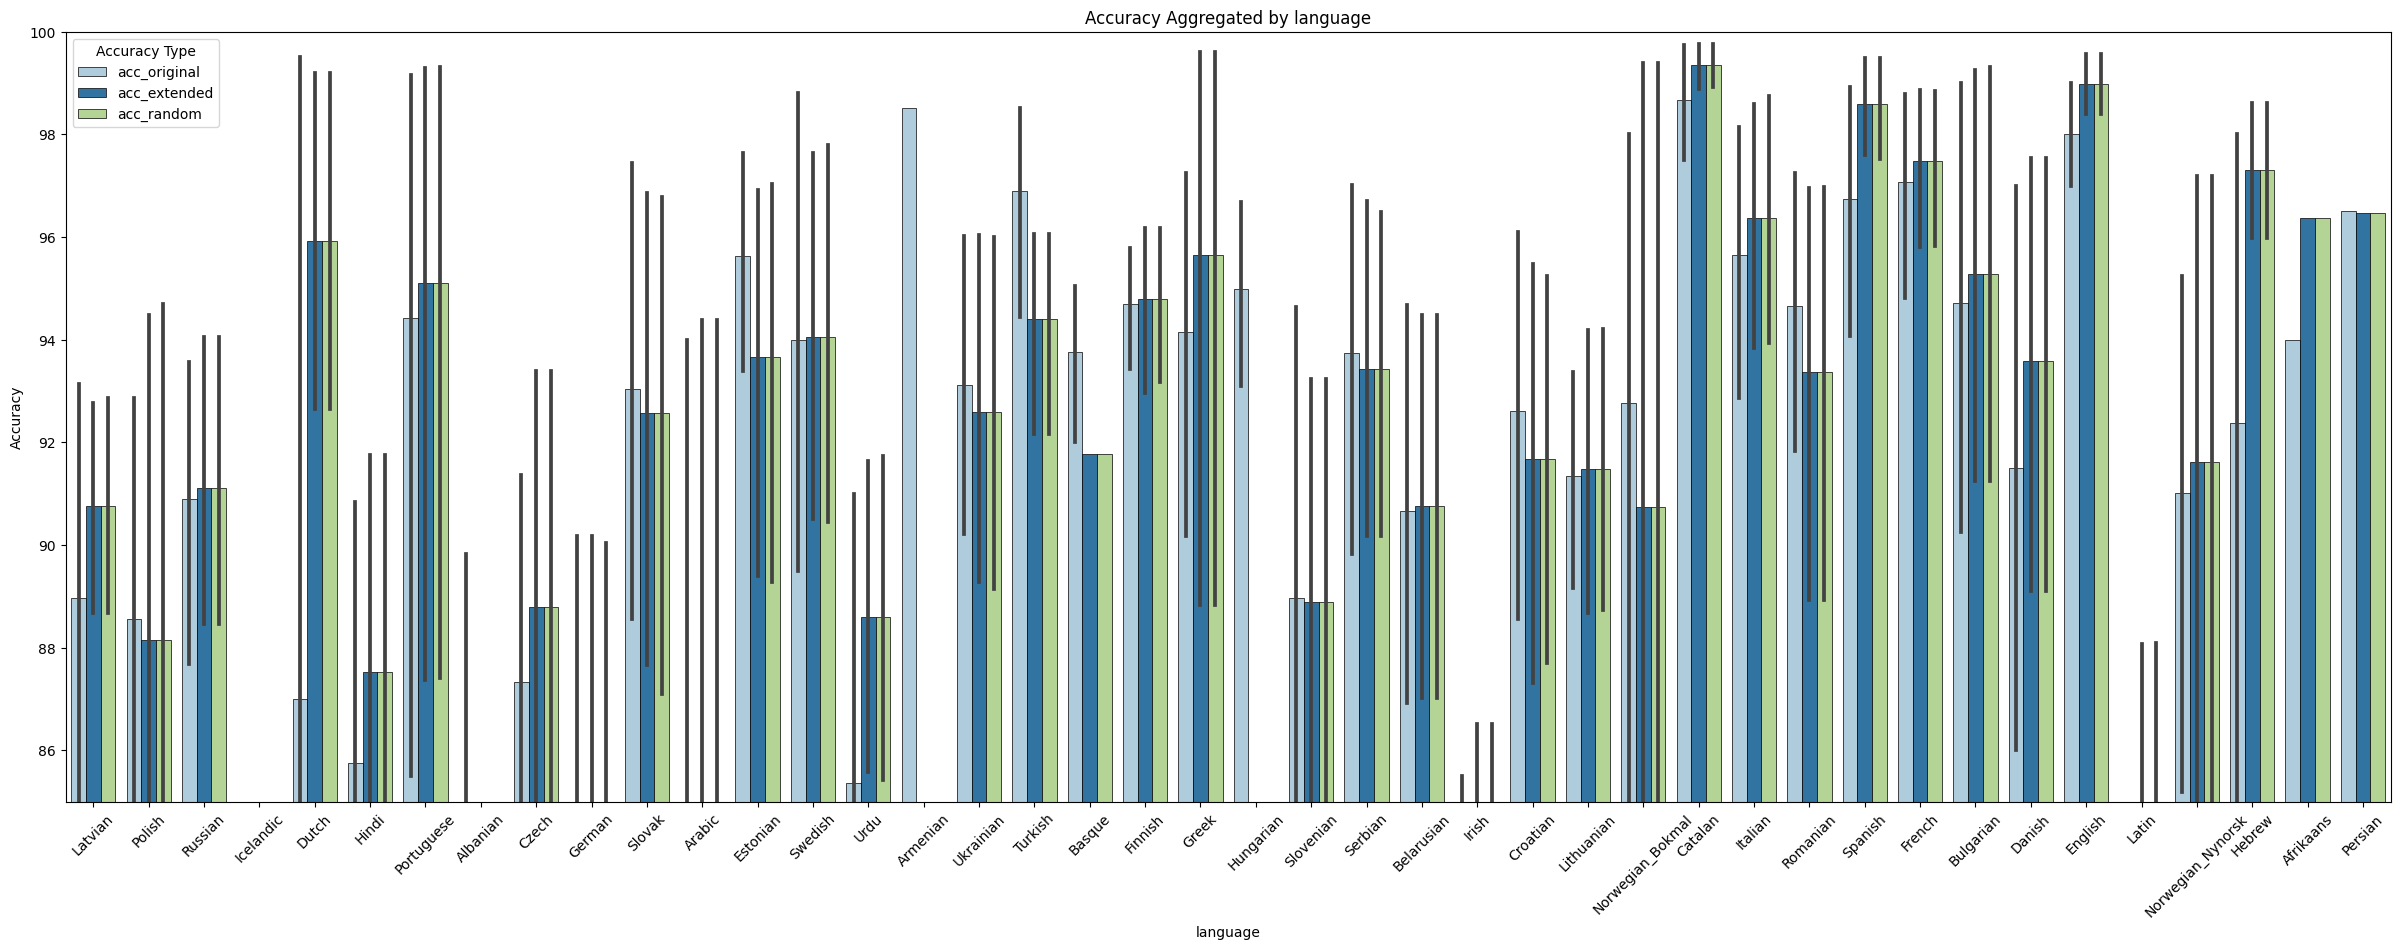

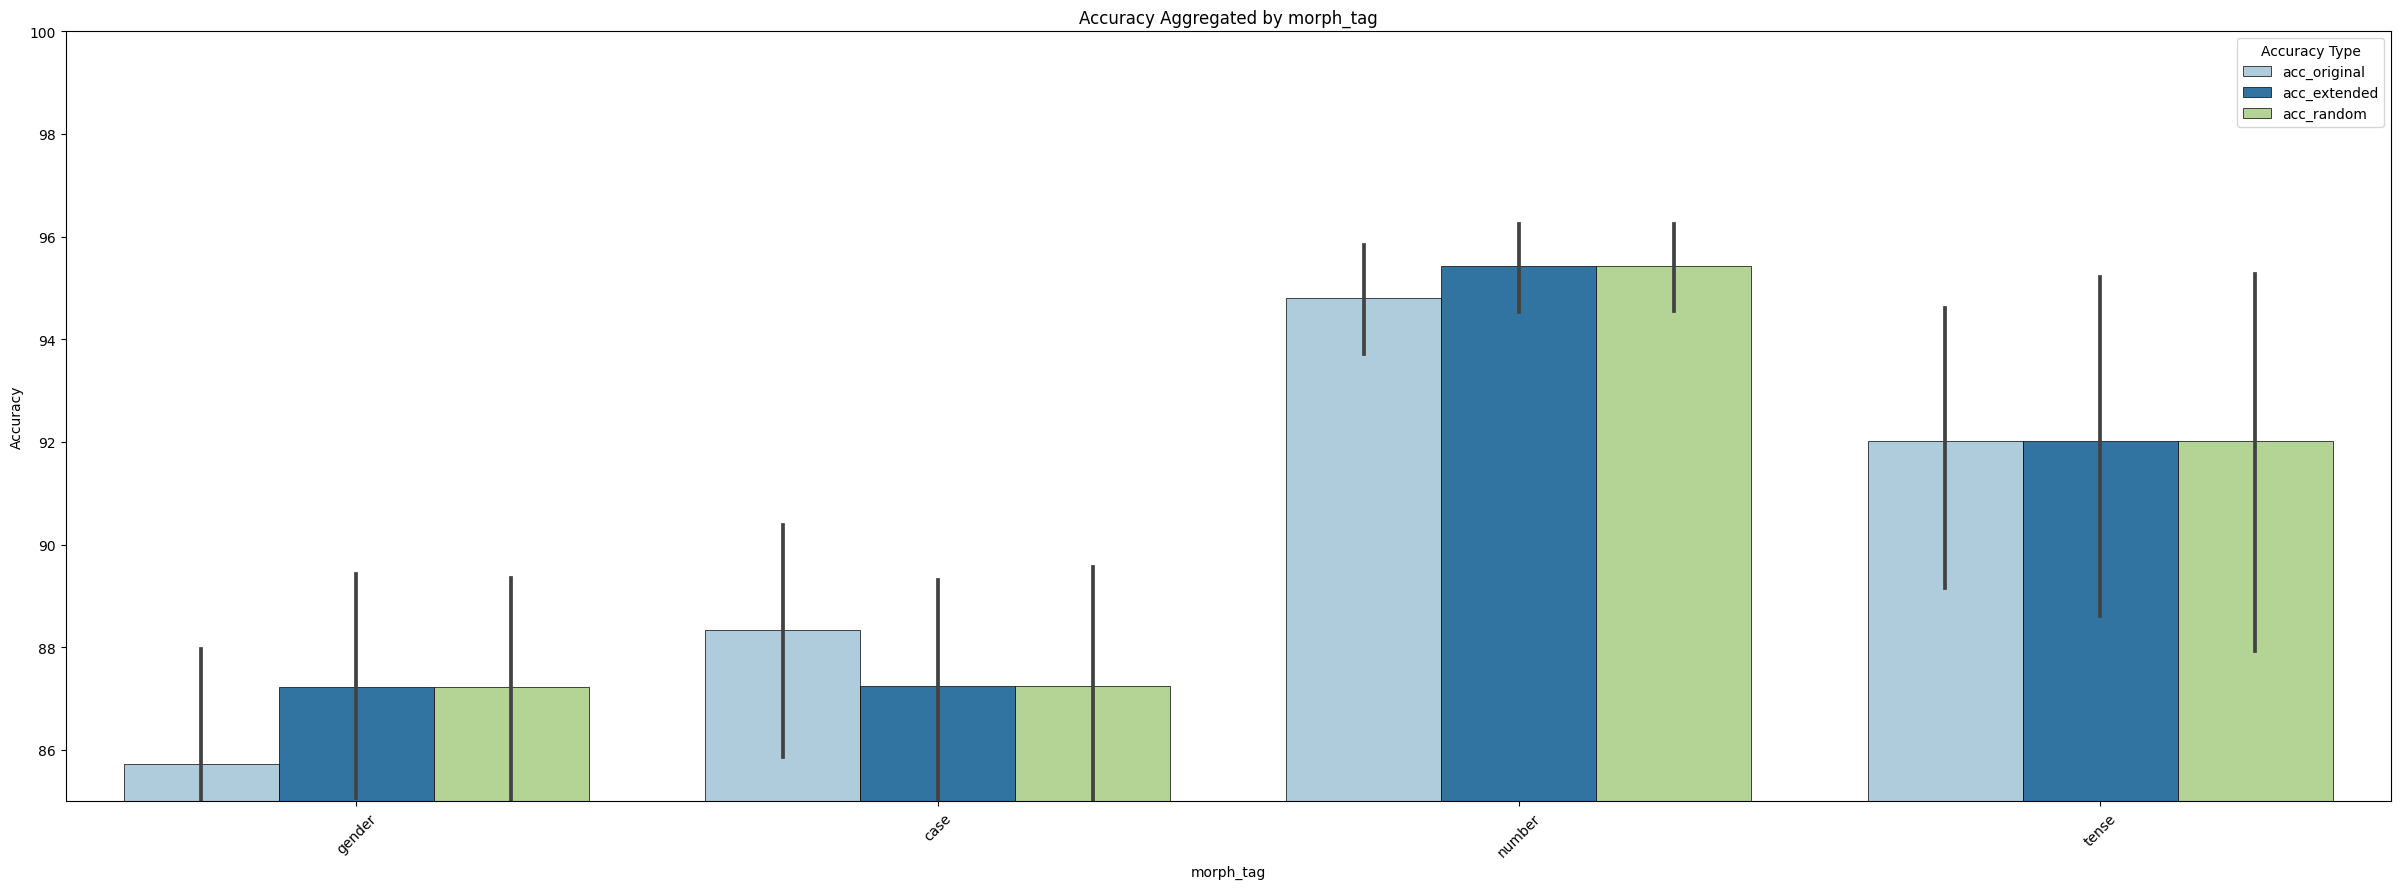

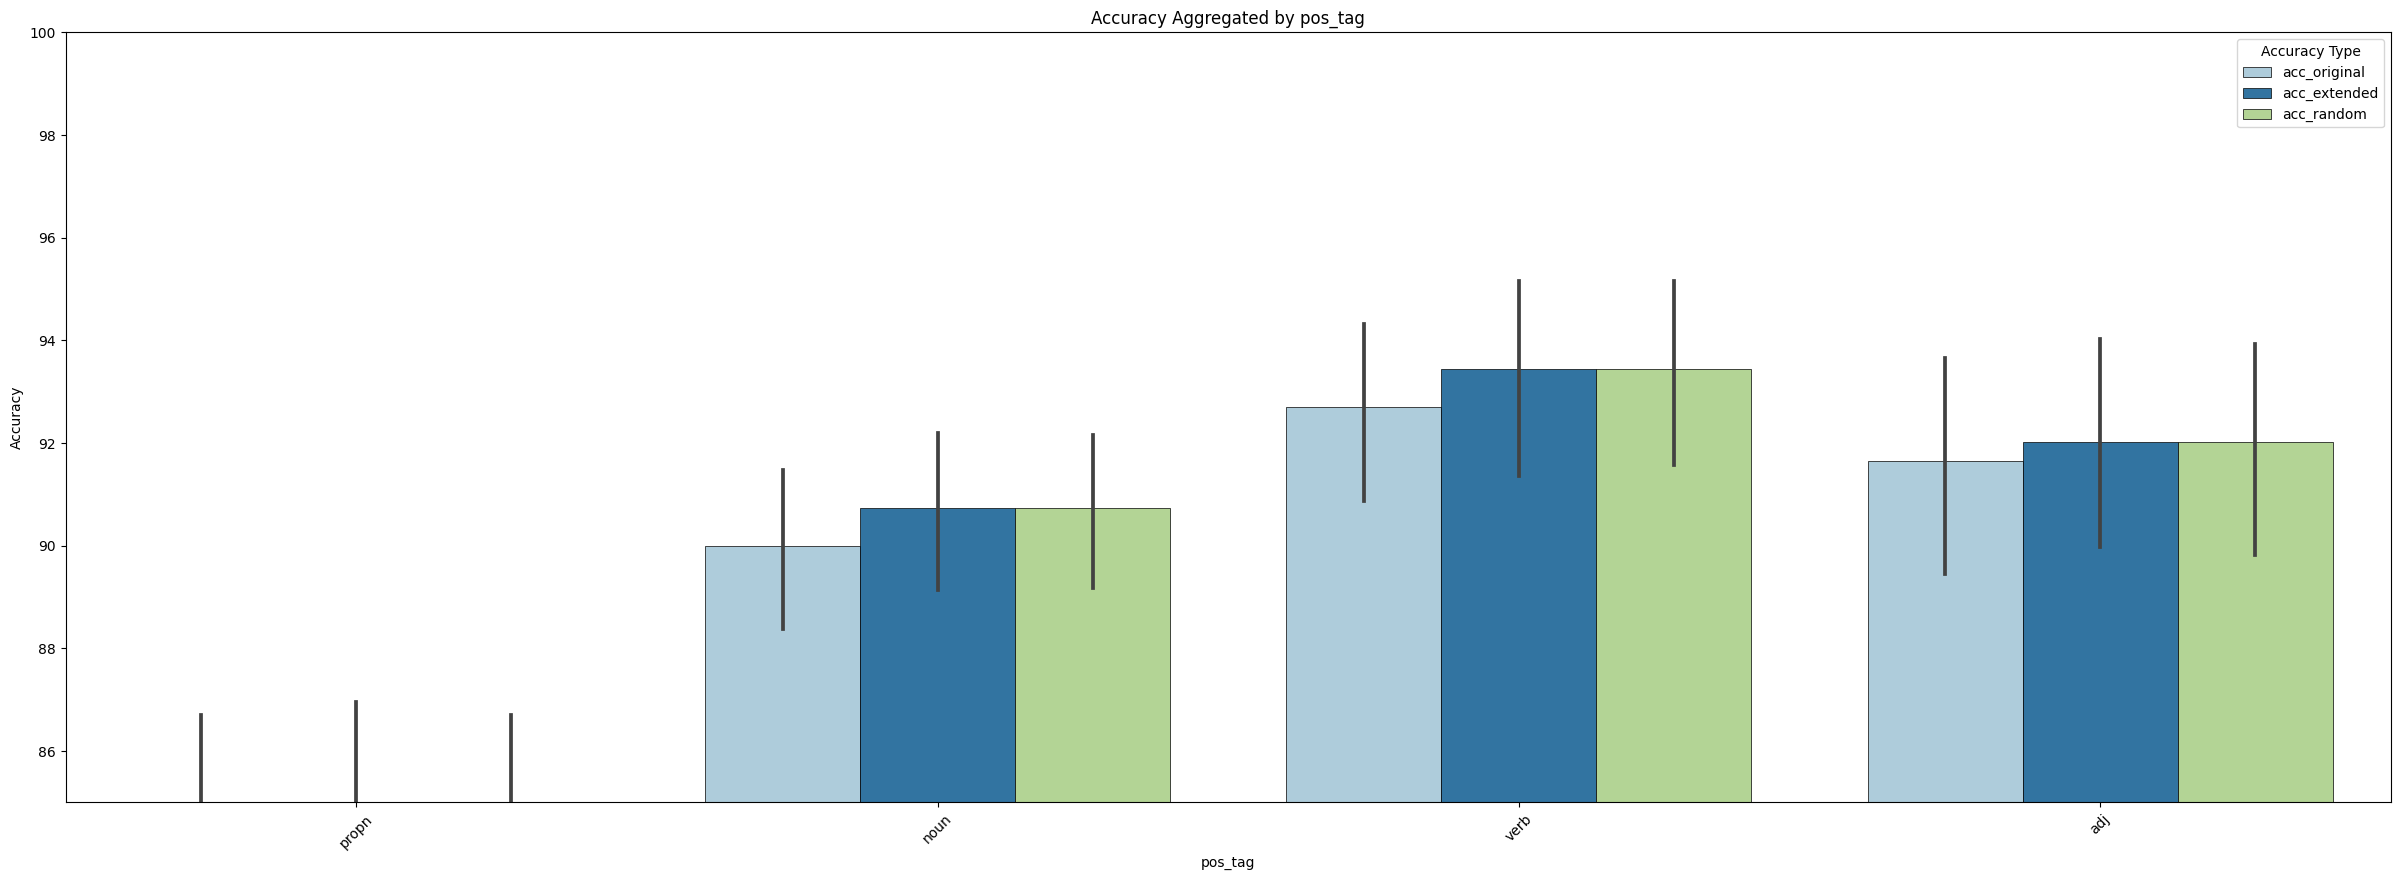

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
from collections import defaultdict
import seaborn as sns

#sns.set_palette(sns.color_palette("Set2")[::2])
#with sns.set_context("paper", font_scale=1.5):

heatmap_cmap = "GnBu"

barplot_kws = dict(linewidth=0.5, edgecolor="black", palette="Paired")
bar_4x4_kwargs = barplot_kws.copy()
bar_4x4_kwargs['ci'] = 'sd'
bar_4x4_kwargs['capsize'] = 0.11

df = pd.read_csv('ssh_inference_accuracy.tsv', sep='\t')
aggregations = ['language', 'morph_tag', 'pos_tag']

for aggregation in aggregations:
  plt.figure(figsize=(30, 10))
  ax = sns.barplot(x=aggregation, y="value", hue="variable", data=pd.melt(df, id_vars=[aggregation], value_vars=['acc_original', 'acc_extended', 'acc_random']),**barplot_kws,)
  ax.set_xlabel(aggregation)
  ax.set_ylabel('Accuracy')
  ax.set_ylim(85, 100)
  ax.set_title(f'Accuracy Aggregated by {aggregation}')
  ax.legend(title="Accuracy Type")
  plt.xticks(rotation=45)
  plt.show()


#Deptree relations in the dataset

## List of the relevant deptree connection types


In [ ]:
import pandas as pd

# Load your data from the input file (replace 'extended_stats.tsv' with your actual file)
with open('extended_stats.tsv', 'r') as f:
    lines = f.readlines()

# Initialize an empty list to store processed data
processed_data = []

# Initialize a set to store unique dependency types
unique_dependency_types = set()

# Iterate through the lines and split into columns
for line in lines:
    parts = line.strip().split('\t')
    language, pos, file = parts[0], parts[1], parts[2]
    dependencies = parts[3:]

    # Add dependency types to the set
    for dependency in dependencies:
        tag, _ = dependency.split('_')
        unique_dependency_types.add(tag)

    # Append the language, pos, file, and original dependencies to the processed data

# Create a list of unique dependency types (without counts) from the set
dependency_types_list = list(unique_dependency_types)
simple_tags = []
for element in dependency_types_list:
  listed = element.split(":")
  tag = listed[0]
  ptag = listed[-1]
  simple_tags.append(tag)
simple_tags = list(set(simple_tags))
print(dependency_types_list)
print(simple_tags)
# Create the header for the new fixed TSV
header = ['Language', 'POS', 'File'] + dependency_types_list

# Update the DataFrame columns with the new header

df = pd.DataFrame(columns = header)



['conj', 'nsubj:caus', 'obj:lvc', 'obl:npmod', 'advmod', 'nmod:part', 'nmod:pred', 'nmod:npmod', 'flat:abs', 'compound:nn', 'nummod:entity', 'fixed', 'advmod:tmod', 'ccomp:relcl', 'flat:range', 'cc', 'compound:prt', 'discourse', 'xcomp:ds', 'advcl:cleft', 'acl:cleft', 'nsubj', 'ccomp:pmod', 'dep:comp', 'flat:title', 'det', 'ccomp:obj', 'nsubj:pass', 'parataxis:rel', 'csubj', 'nmod:arg', 'nmod', 'orphan', 'compound:smixut', 'advcl', 'flat', 'parataxis:appos', 'csubj:cleft', 'conj:expl', 'flat:repeat', 'conj:svc', 'vocative', 'obl:lmod', 'parataxis:obj', 'iobj:agent', 'obl:mod', 'obl:cmpr', 'advcl:cmpr', 'advcl:svc', 'csubj:relcl', 'nummod', 'obj:agent', 'parataxis:discourse', 'iobj', 'nmod:poss', 'flat:foreign', 'nmod:tmod', 'flat:name', 'clf', 'acl:relcl', 'xcomp:pred', 'obl:arg', 'case', 'advcl:relcl', 'advcl:pred', 'compound:redup', 'parataxis:insert', 'advcl:abs', 'obj', 'csubj:pass', 'dislocated', 'nummod:gov', 'nmod:flat', 'vocative:cl', 'compound:svc', 'parataxis:restart', 'appos

In [ ]:
import pandas as pd

simple = True
# Create the header for the new fixed TSV dynamically
header = ['Language', 'POS', 'File'] + simple_tags
rows = []

with open('extended_stats.tsv', 'r') as f:
    lines = f.readlines()

for line in lines:
    parts = line.strip().split('\t')
    language, pos, file = parts[0], parts[1], parts[2]
    dependencies = parts[3:]
    row_dict = {col: 0 for col in header[3:]}
    if simple:
      tags = simple_tags
    for dep_type in tags:
        for element in dependencies:
          listed = element.split('_')
          count = listed[-1]
          name = listed[0]
          #count = sum(1 for dependency in dependencies if dep_type in dependency)
          if dep_type in name:
            row_dict[dep_type] = count
        rowlist = parts[:3]+[*row_dict.values()]
        #print(rowlist)
    rows.append(rowlist)


# Create a DataFrame with the dynamically generated header
df = pd.DataFrame(rows, columns=header)
print(df)
# Save the fixed DataFrame to a new TSV file (replace 'fixed_data.tsv' with your desired output file name)
df.to_csv('fixed_data.tsv', sep='\t', index=False)


      Language          POS       File appos list det conj   obl ccomp nummod  \
0    Afrikaans  number_noun    dev.tsv     0    0   0   79   114     0      0   
1    Afrikaans  number_noun   test.tsv     0    0   0   96   129     0      0   
2    Afrikaans  number_noun  train.tsv     2    0   0  599   906     0      0   
3       Arabic     case_adj    dev.tsv     2    0   0   25     5     5      0   
4       Arabic     case_adj   test.tsv     1    0   0   19     2    32      0   
..         ...          ...        ...   ...  ...  ..  ...   ...   ...    ...   
703       Urdu  gender_noun   test.tsv     0    0   0   40   211     0      0   
704       Urdu  gender_noun  train.tsv     0    0   0  475  1848     0      1   
705       Urdu  number_noun    dev.tsv     0    0   0   41   217     0      0   
706       Urdu  number_noun   test.tsv     0    0   0   37   216     0      0   
707       Urdu  number_noun  train.tsv     0    0   0  471  1923     0      1   

     ...  obj  cc dislocate

      Language          POS       File  appos  list  det  conj   obl  ccomp  \
0    Afrikaans  number_noun    dev.tsv      0     0    0    79   114      0   
1    Afrikaans  number_noun   test.tsv      0     0    0    96   129      0   
2    Afrikaans  number_noun  train.tsv      2     0    0   599   906      0   
3       Arabic     case_adj    dev.tsv      2     0    0    25     5      5   
4       Arabic     case_adj   test.tsv      1     0    0    19     2     32   
..         ...          ...        ...    ...   ...  ...   ...   ...    ...   
703       Urdu  gender_noun   test.tsv      0     0    0    40   211      0   
704       Urdu  gender_noun  train.tsv      0     0    0   475  1848      0   
705       Urdu  number_noun    dev.tsv      0     0    0    41   217      0   
706       Urdu  number_noun   test.tsv      0     0    0    37   216      0   
707       Urdu  number_noun  train.tsv      0     0    0   471  1923      0   

     nummod  ...  obj  cc  dislocated  amod  discou

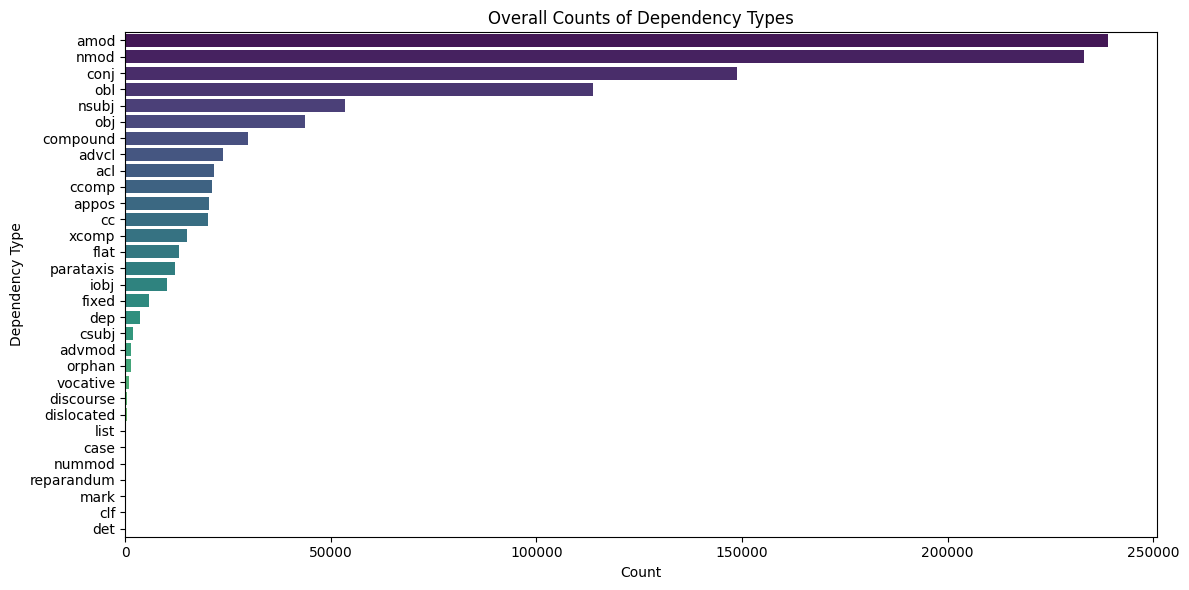

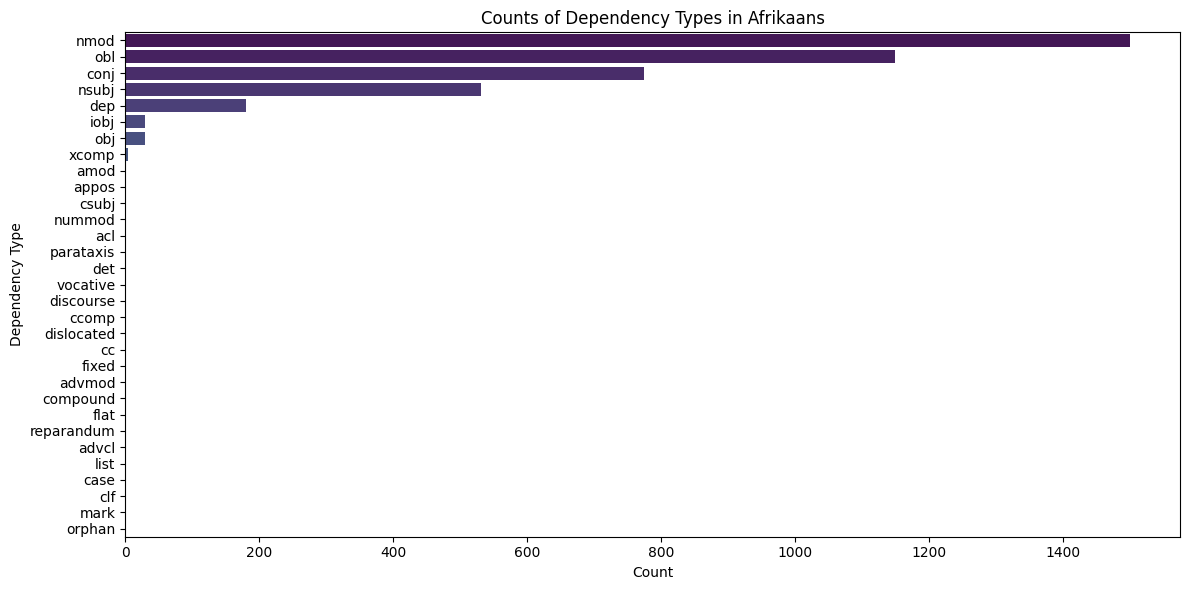

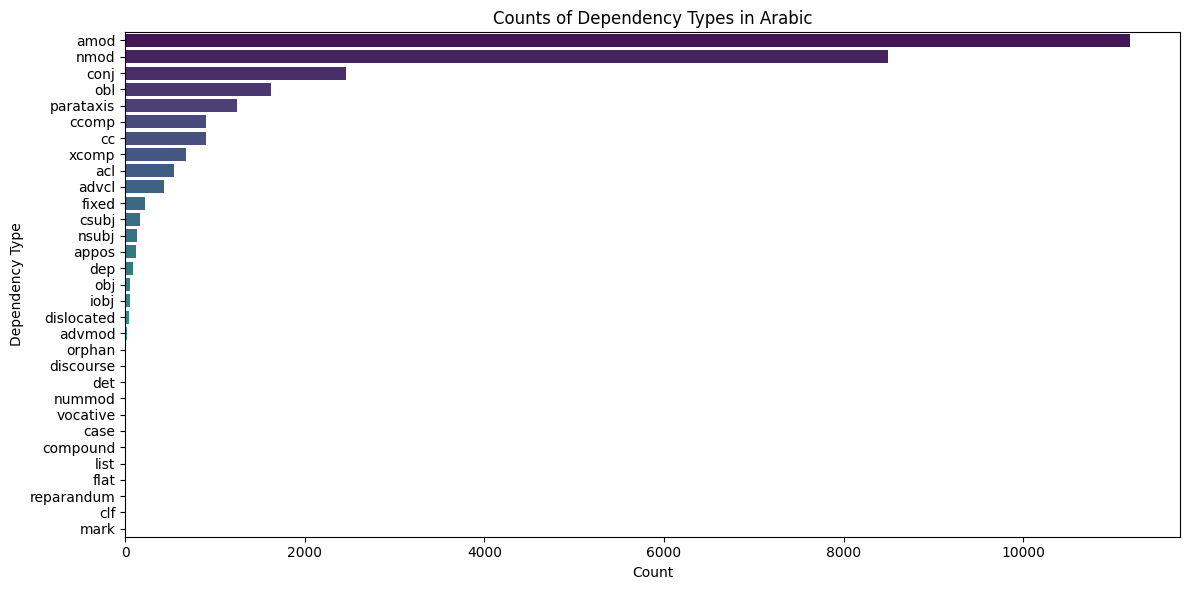

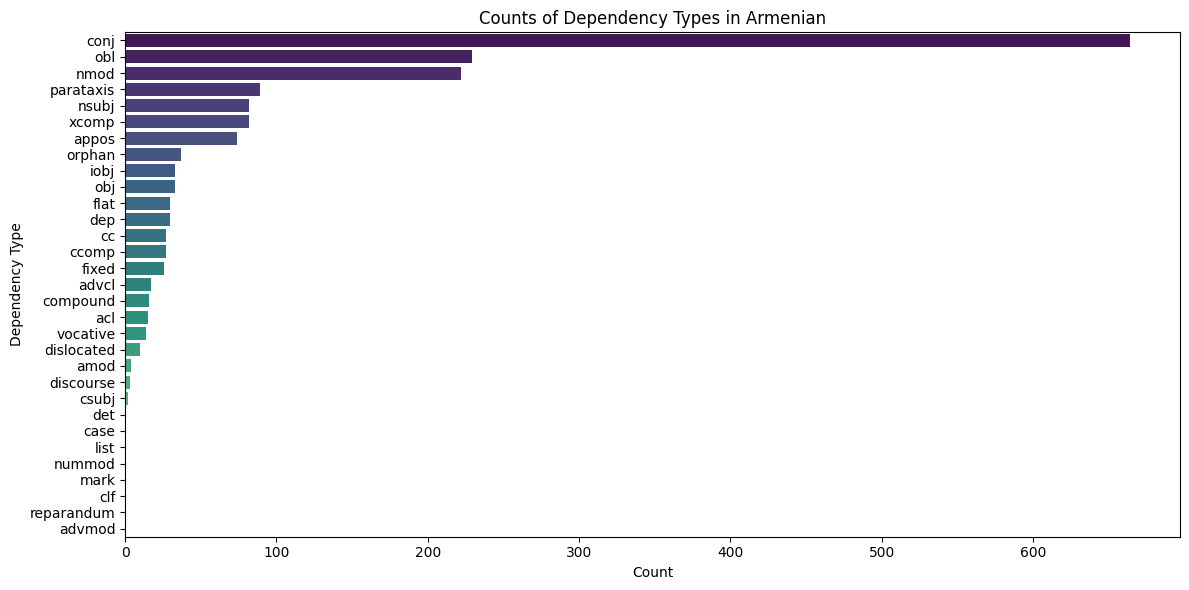

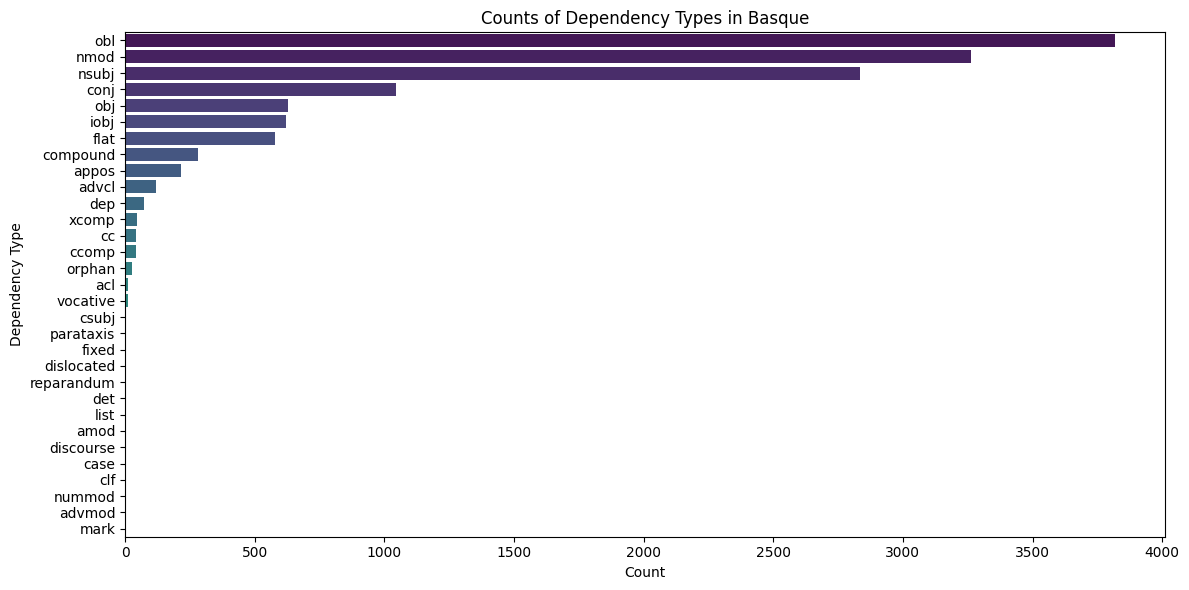

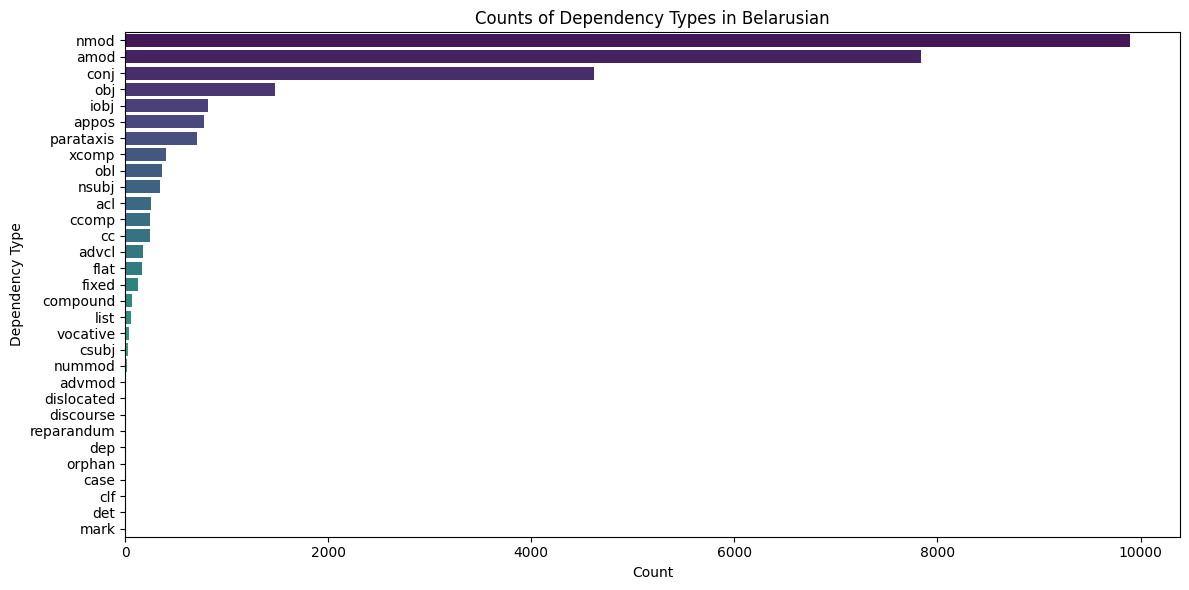

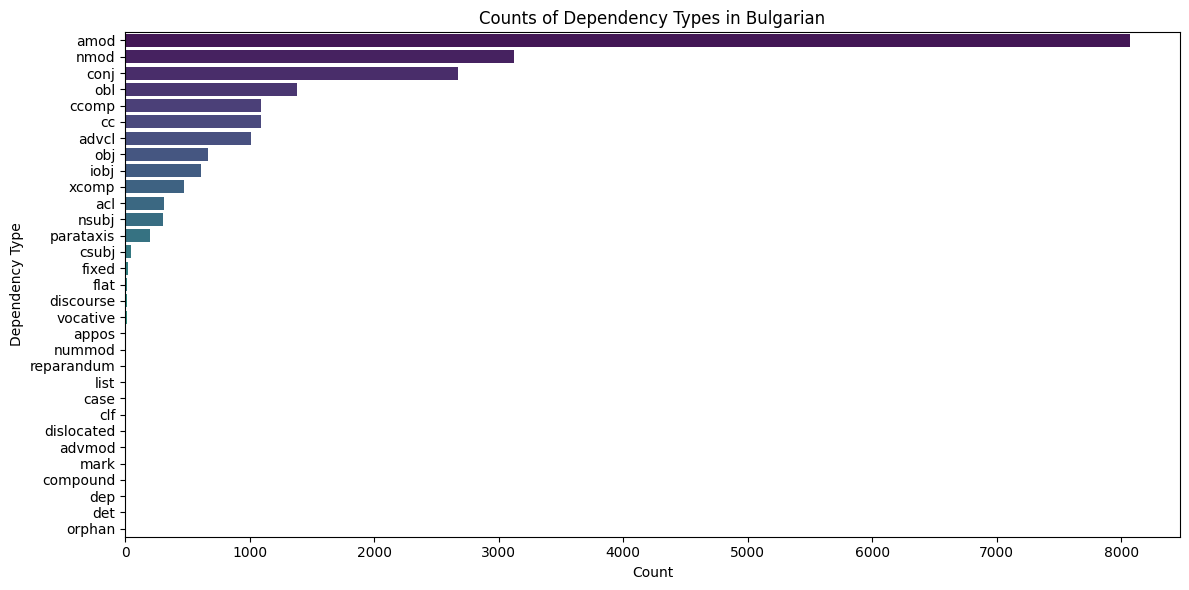

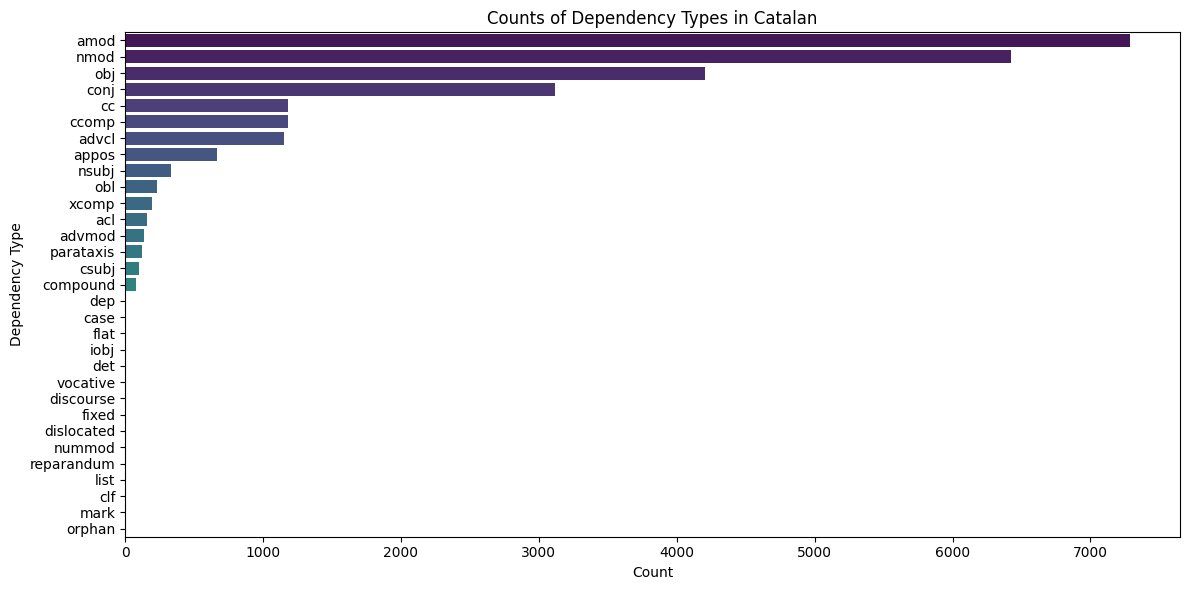

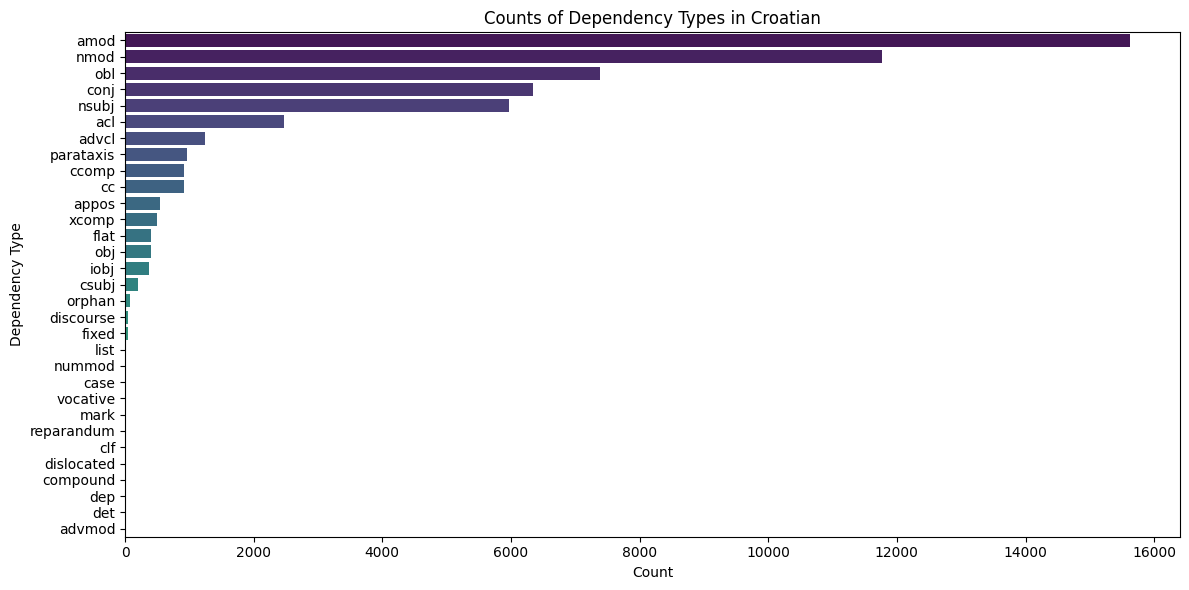

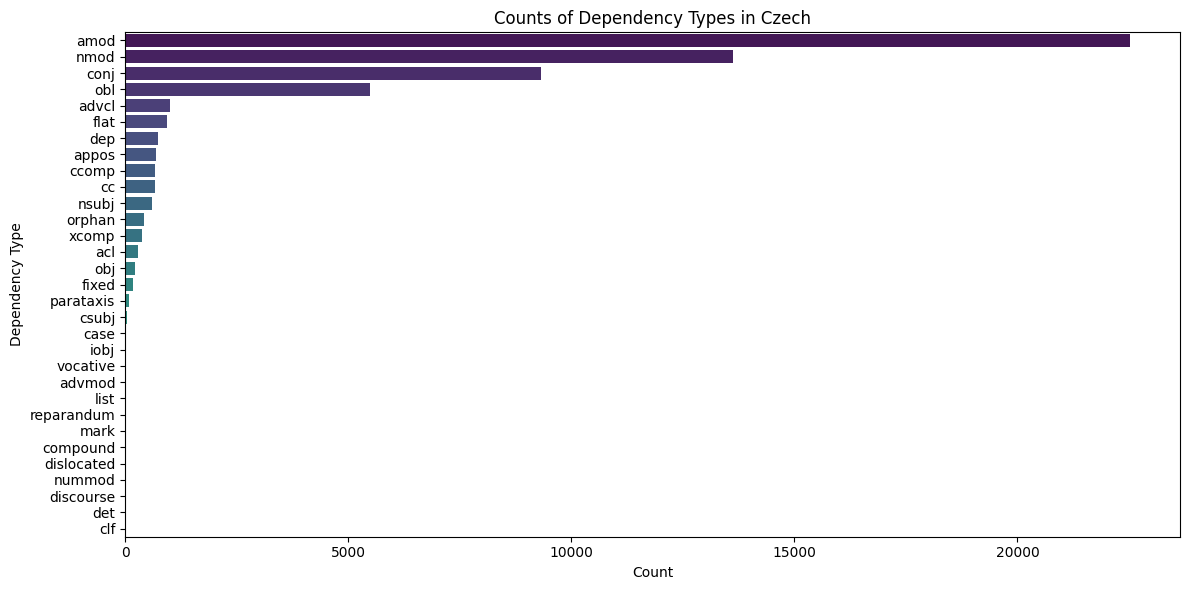

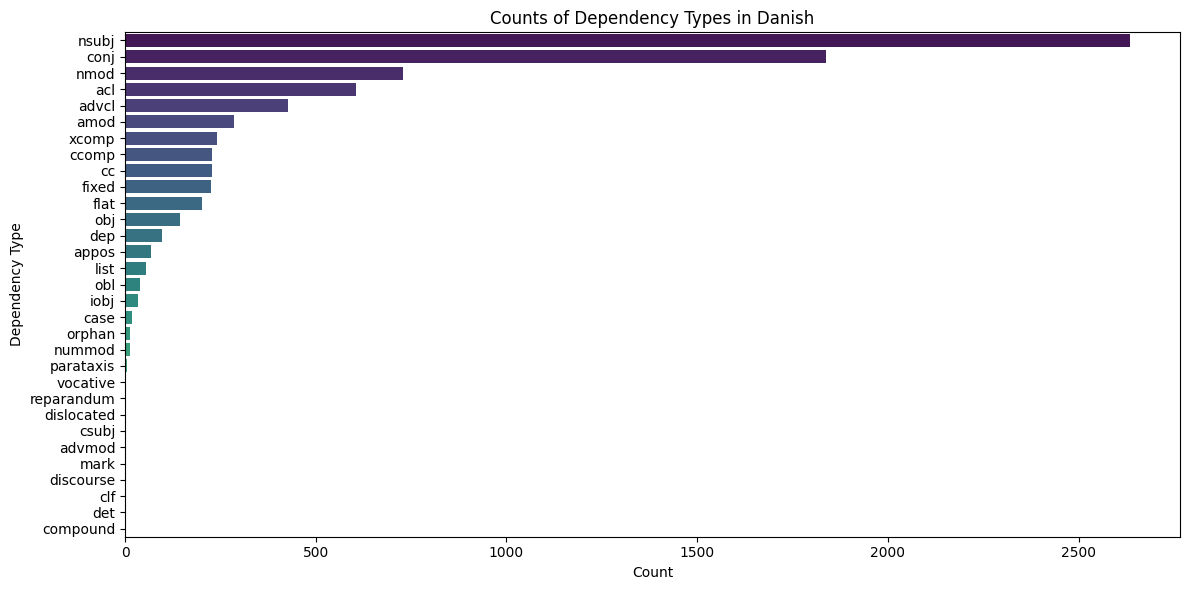

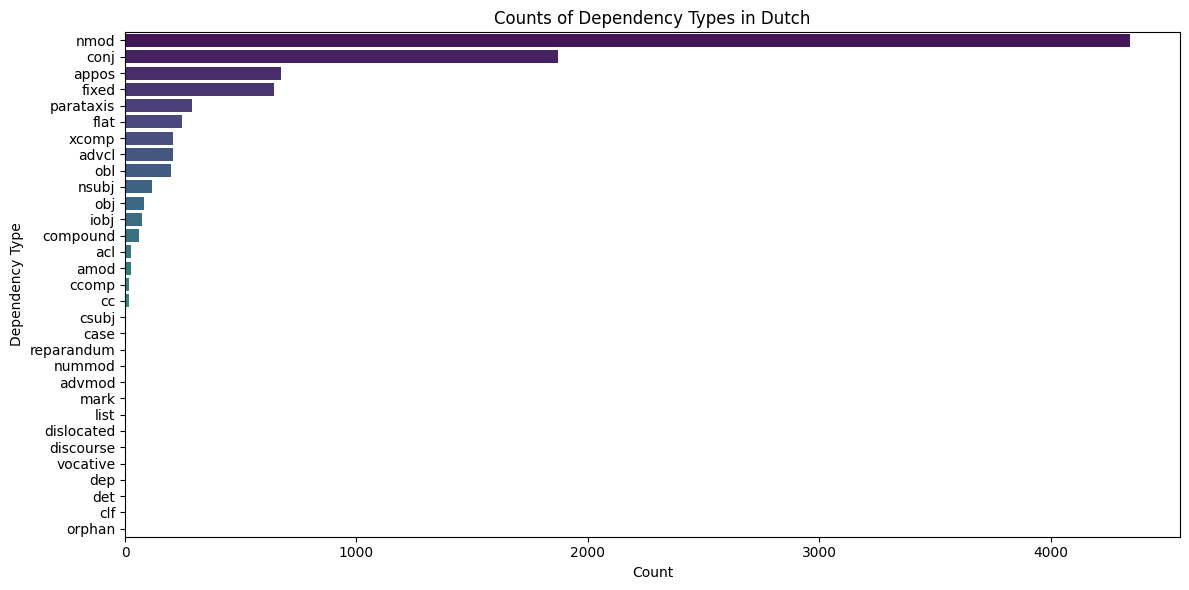

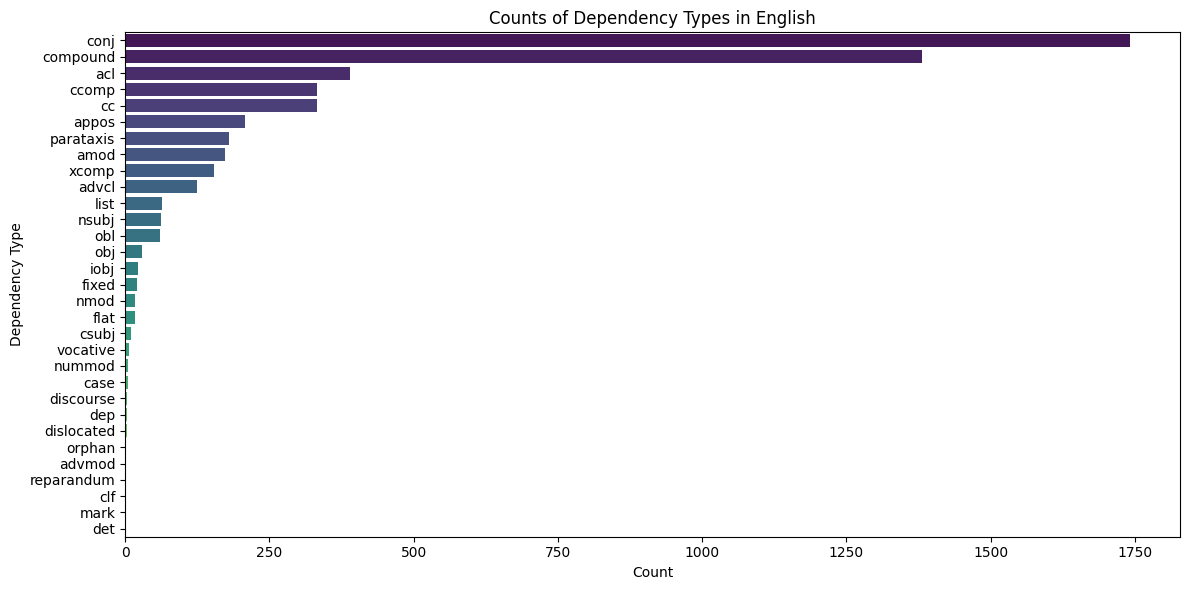

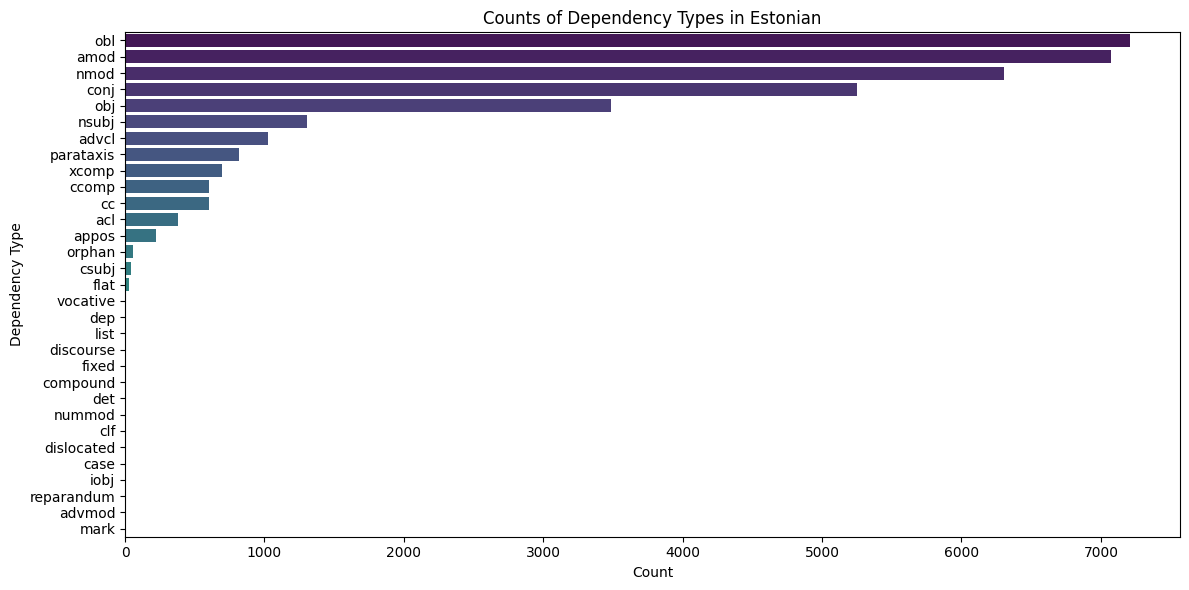

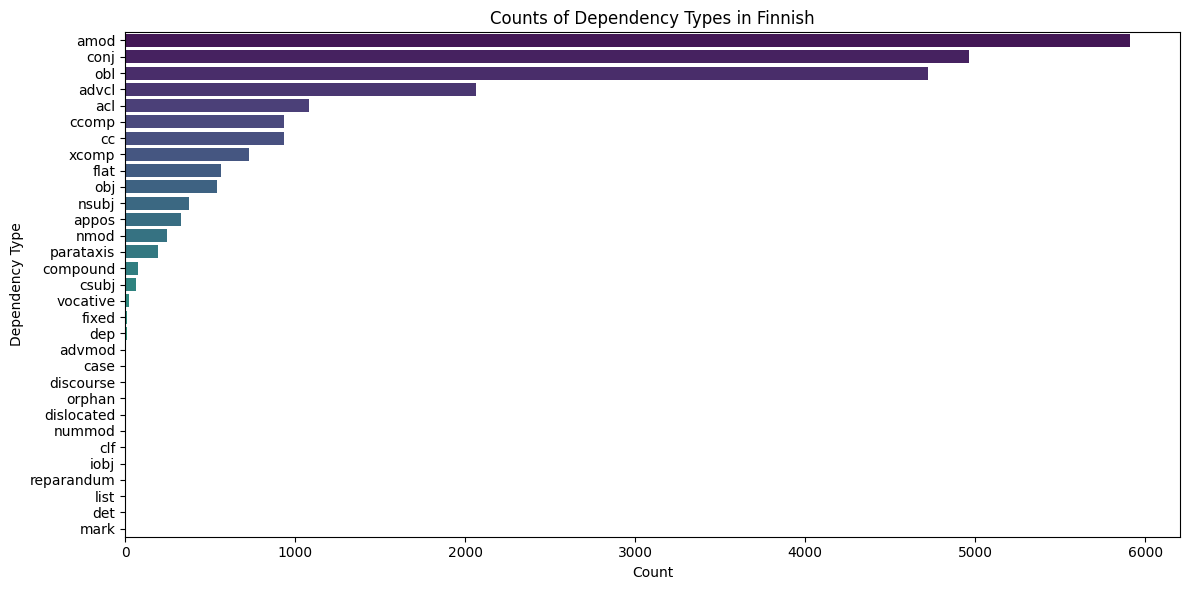

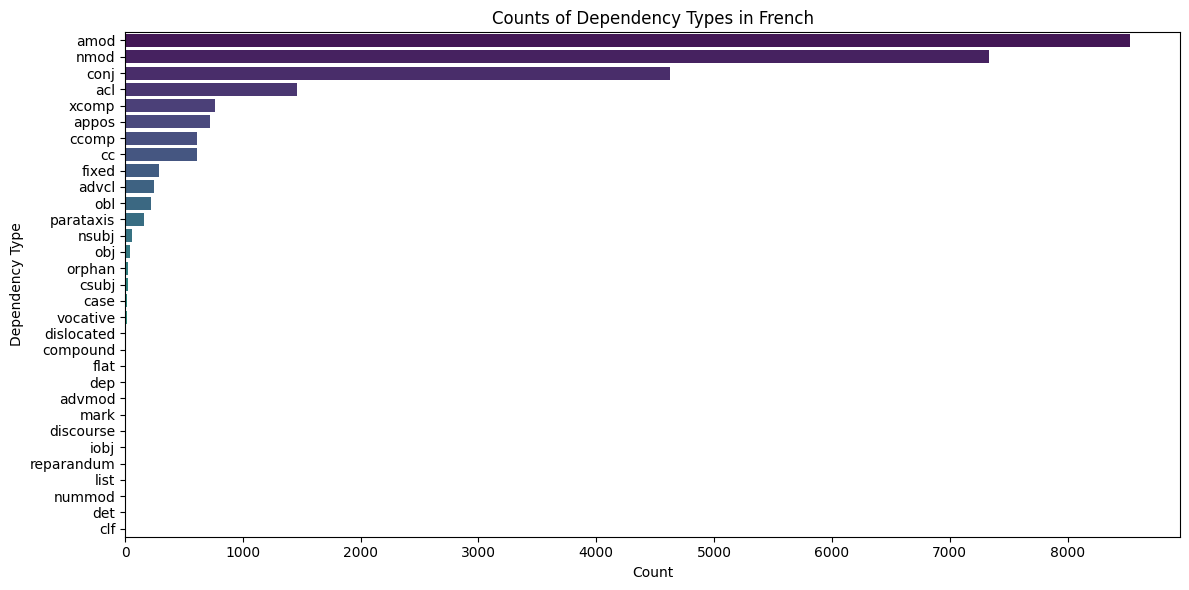

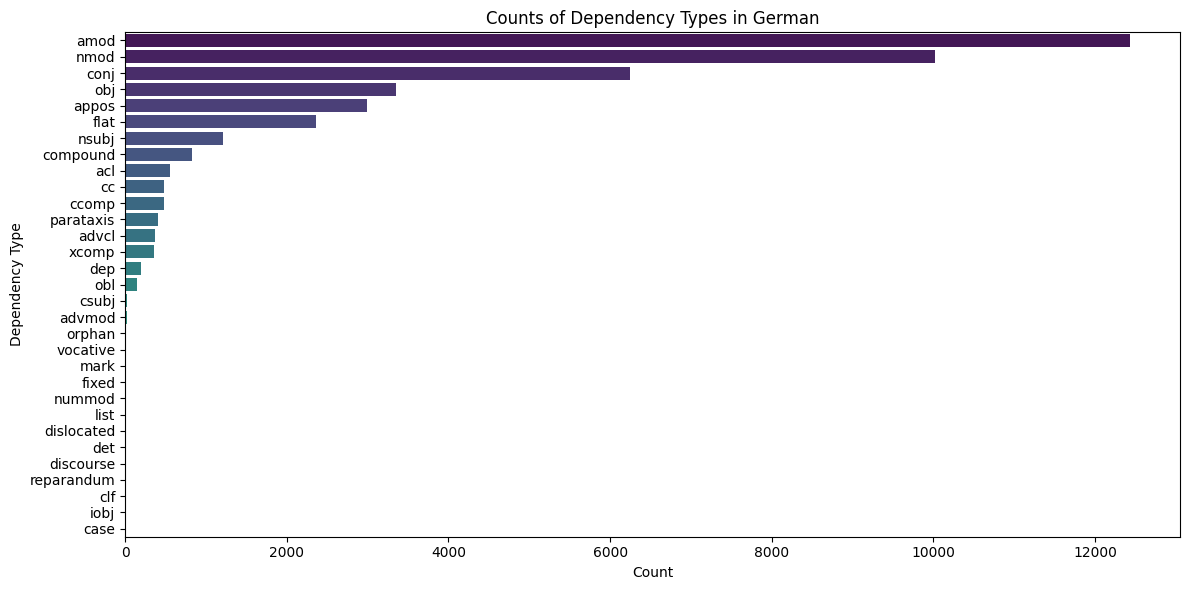

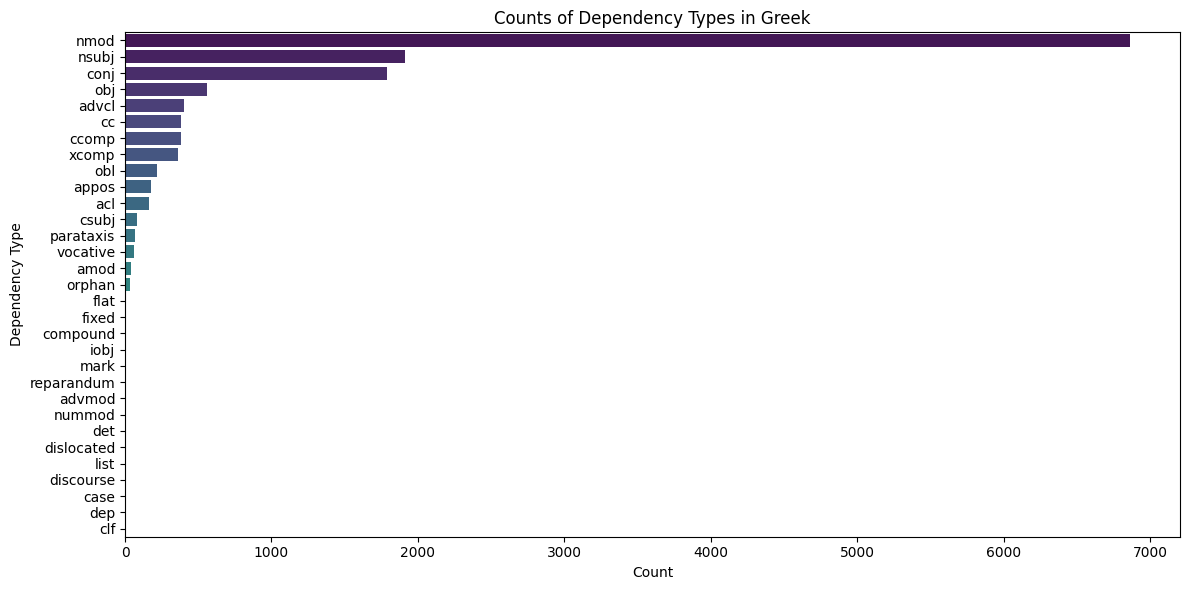

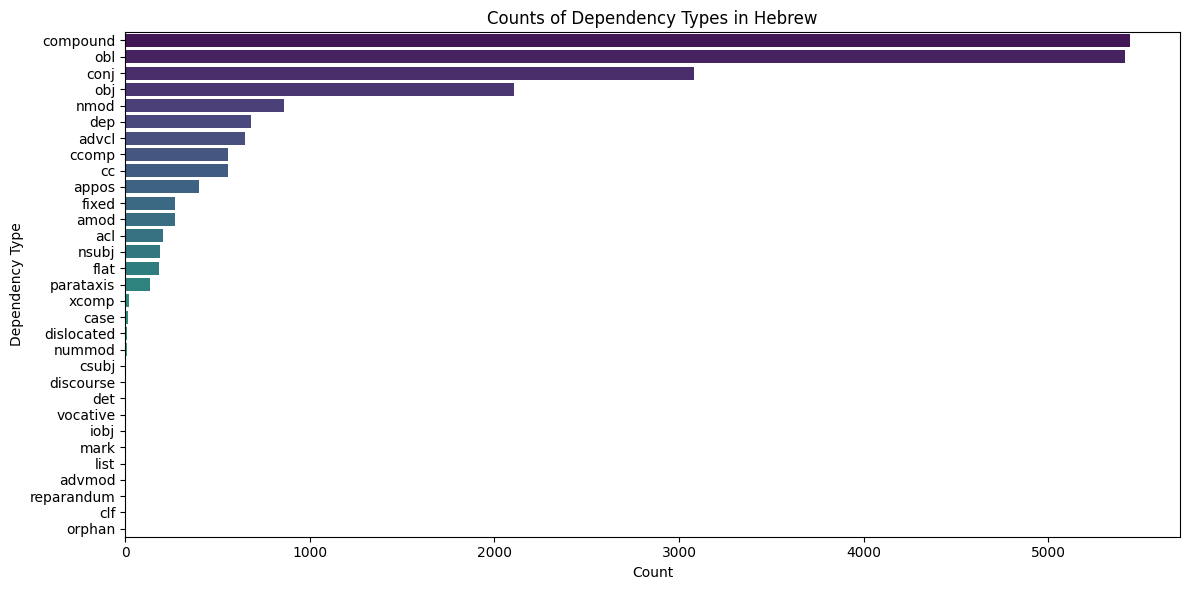

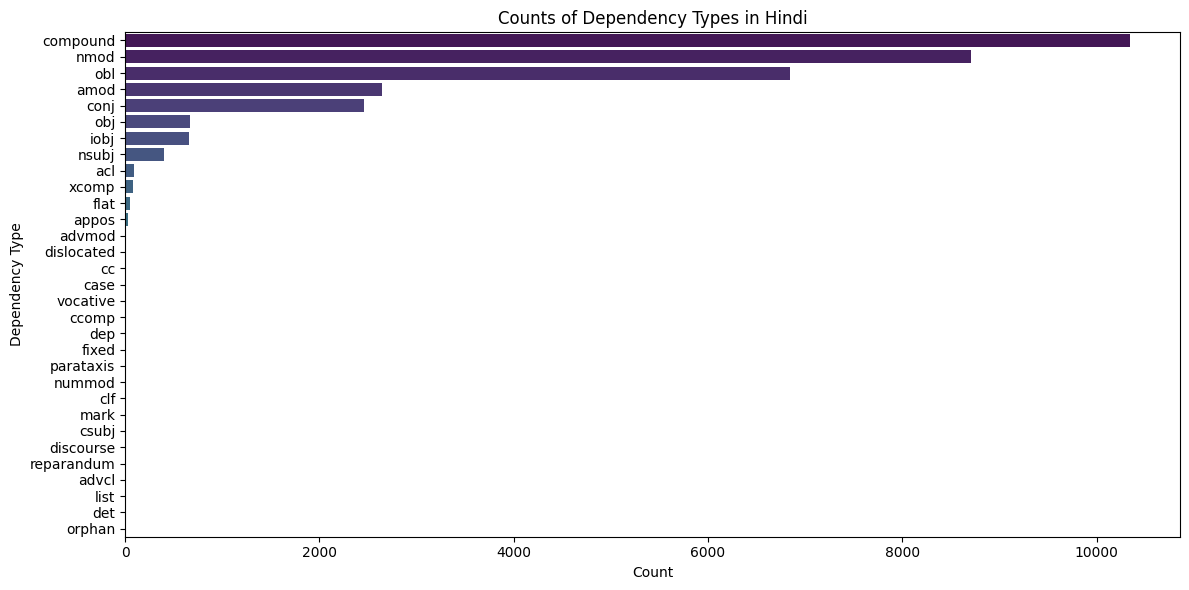

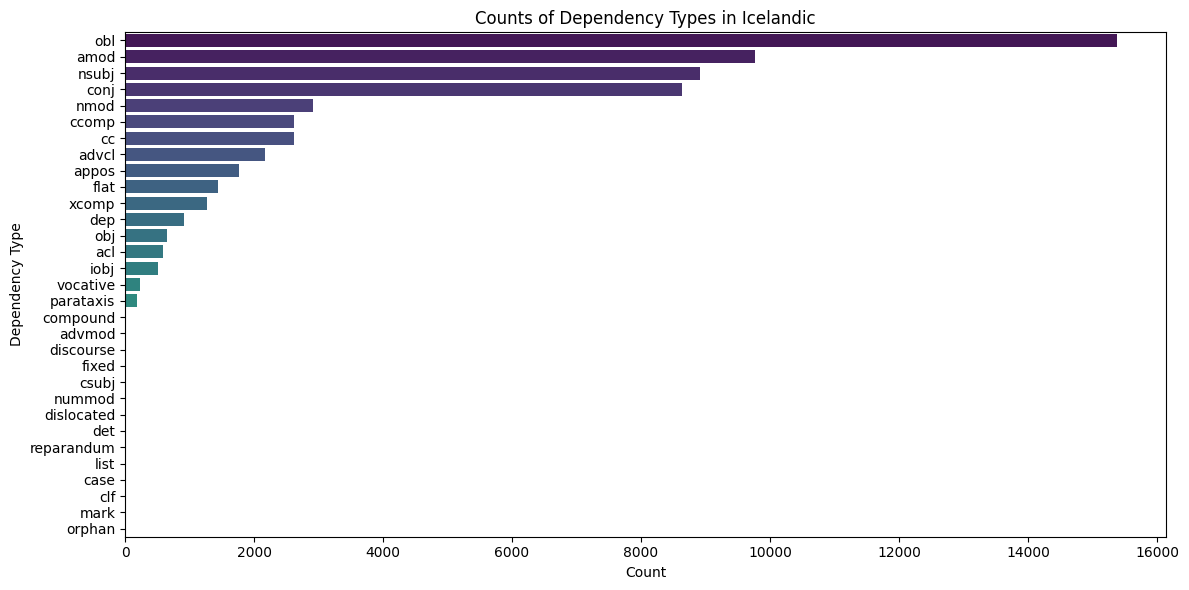

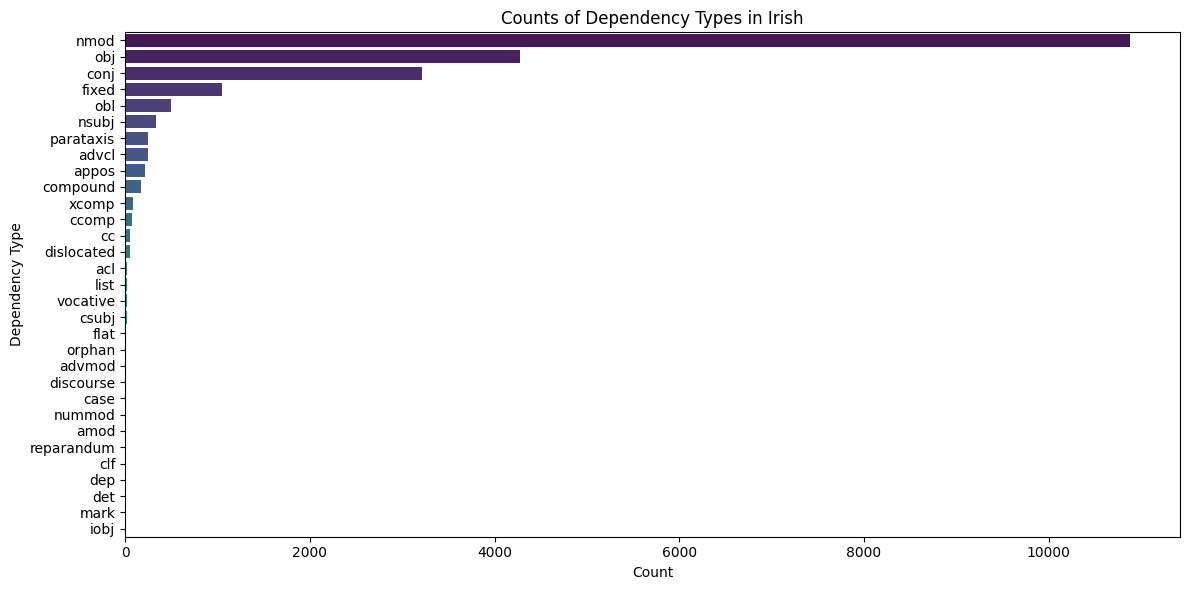

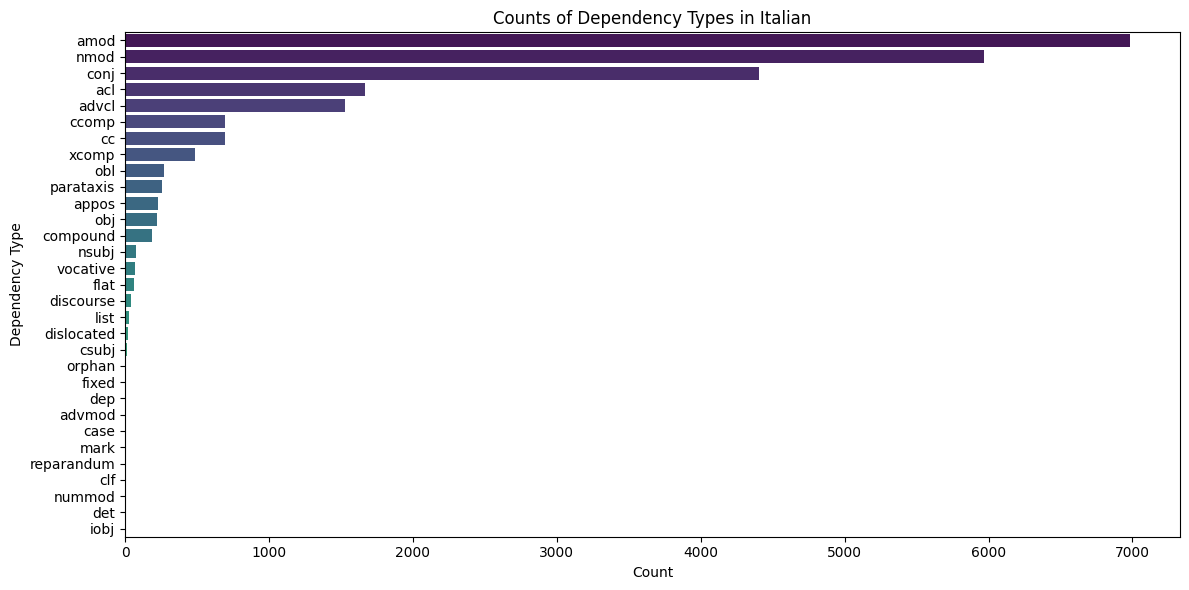

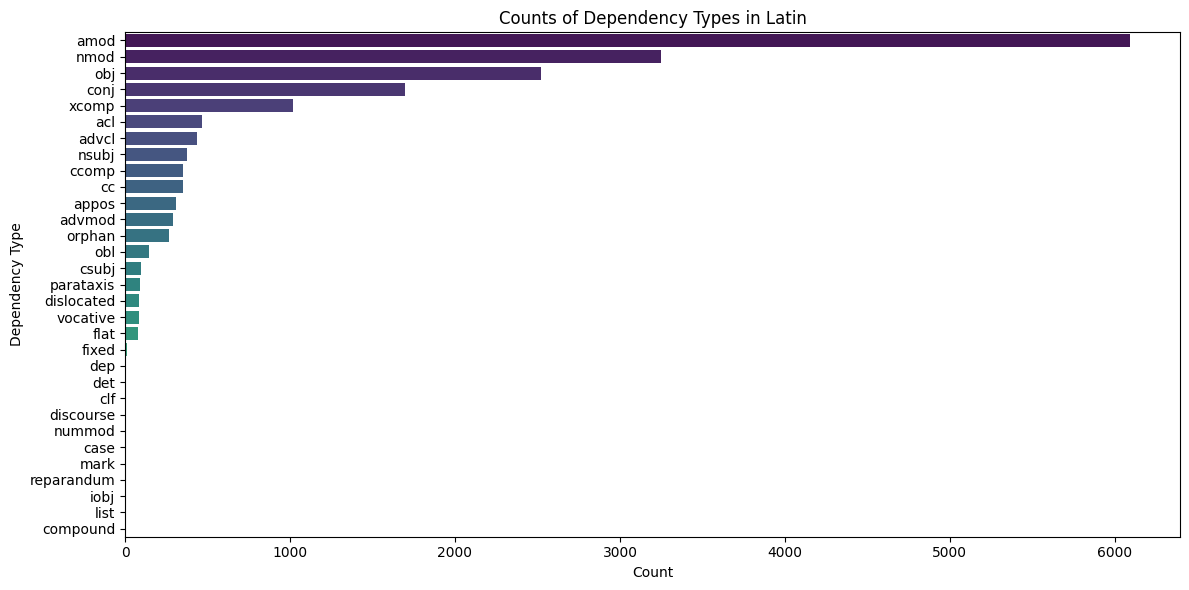

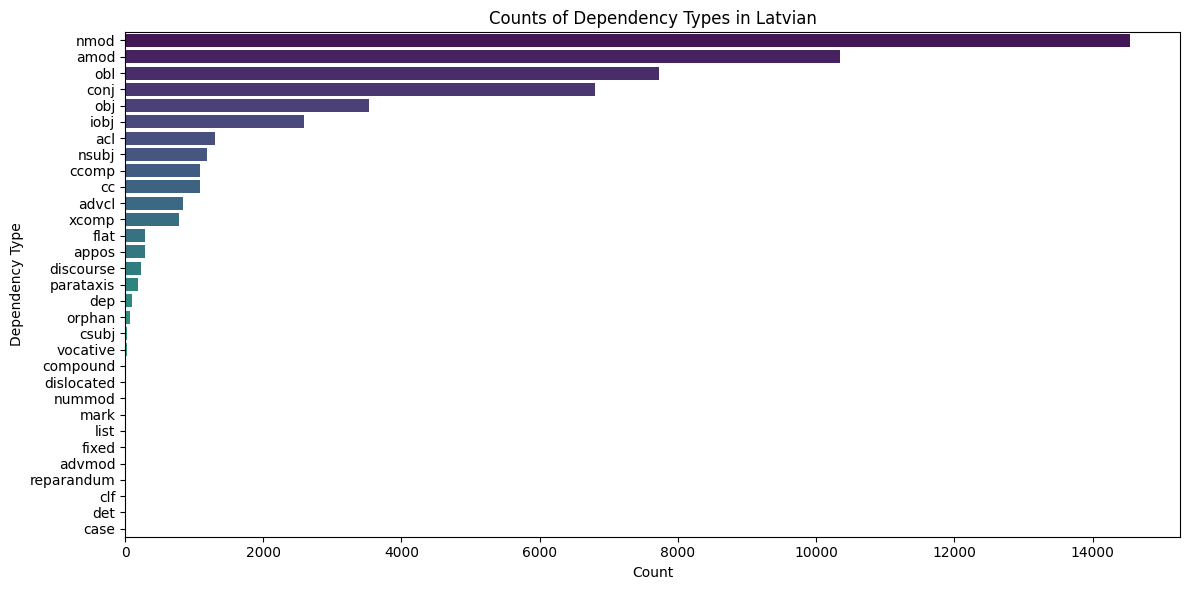

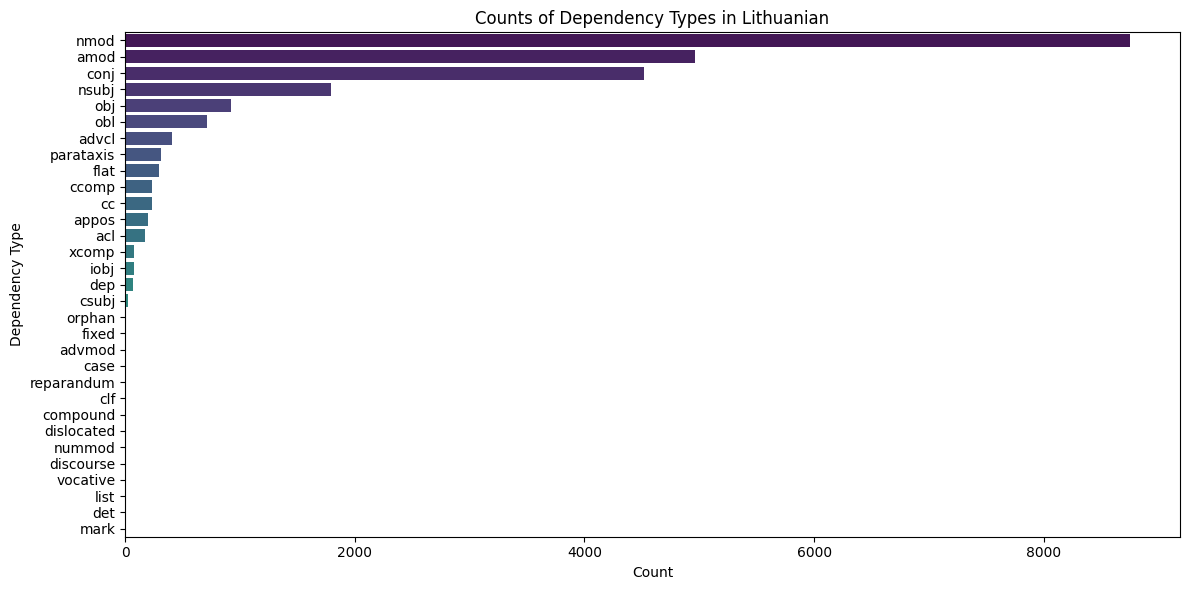

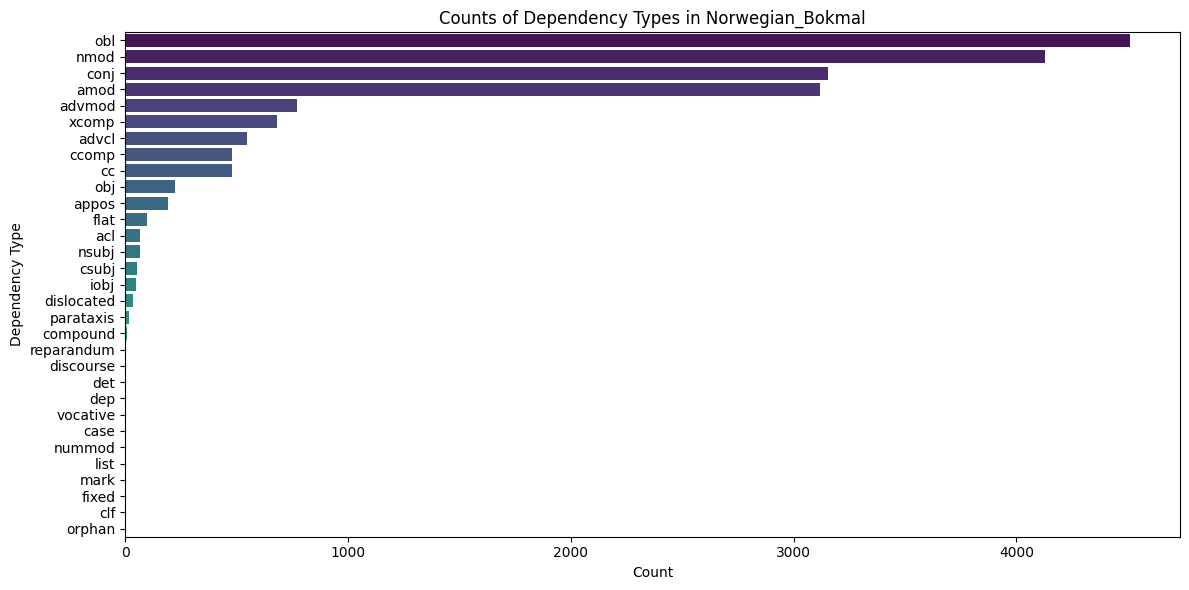

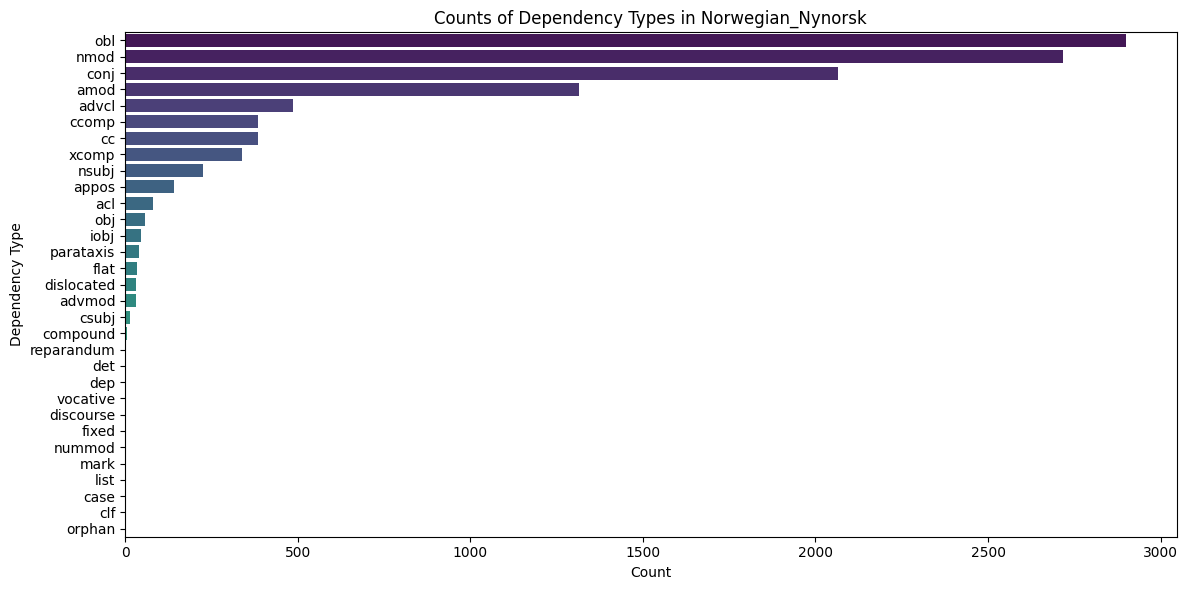

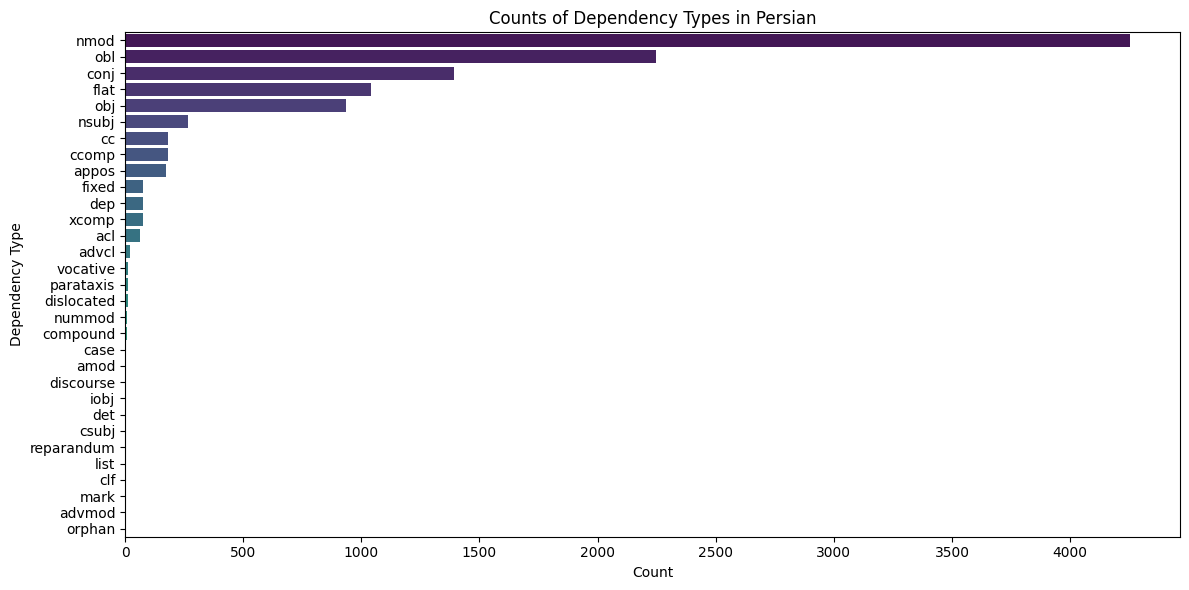

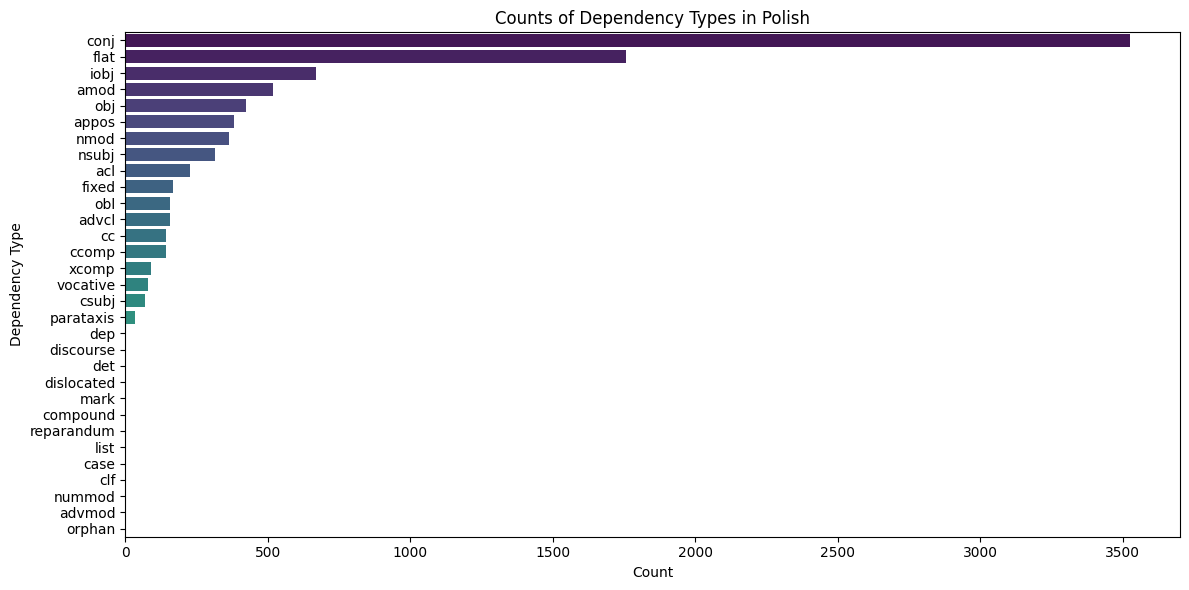

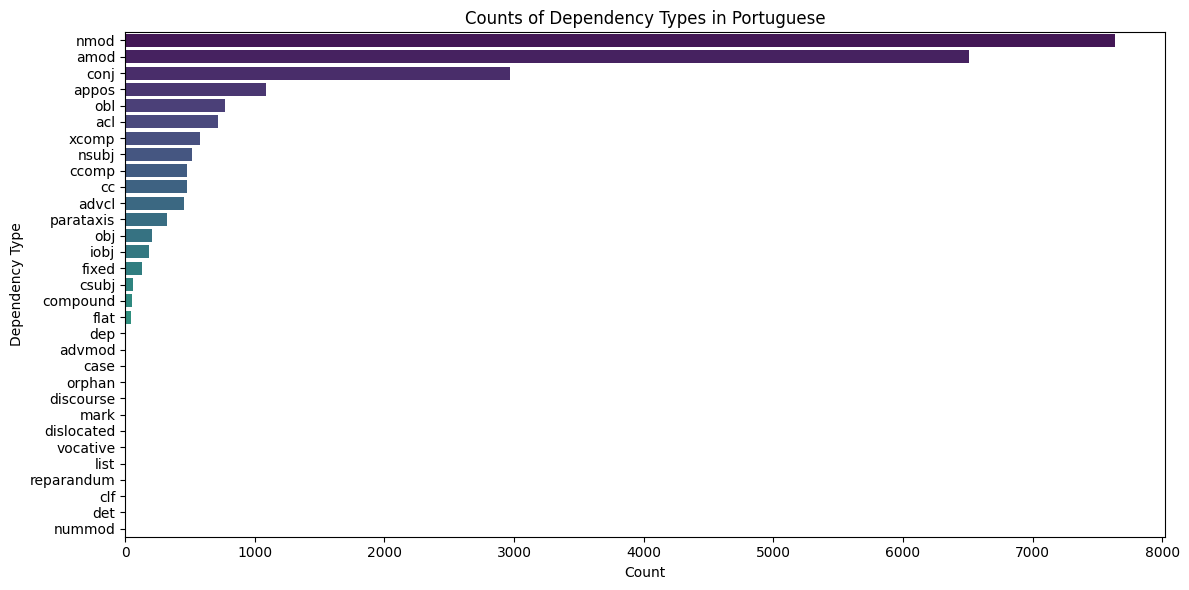

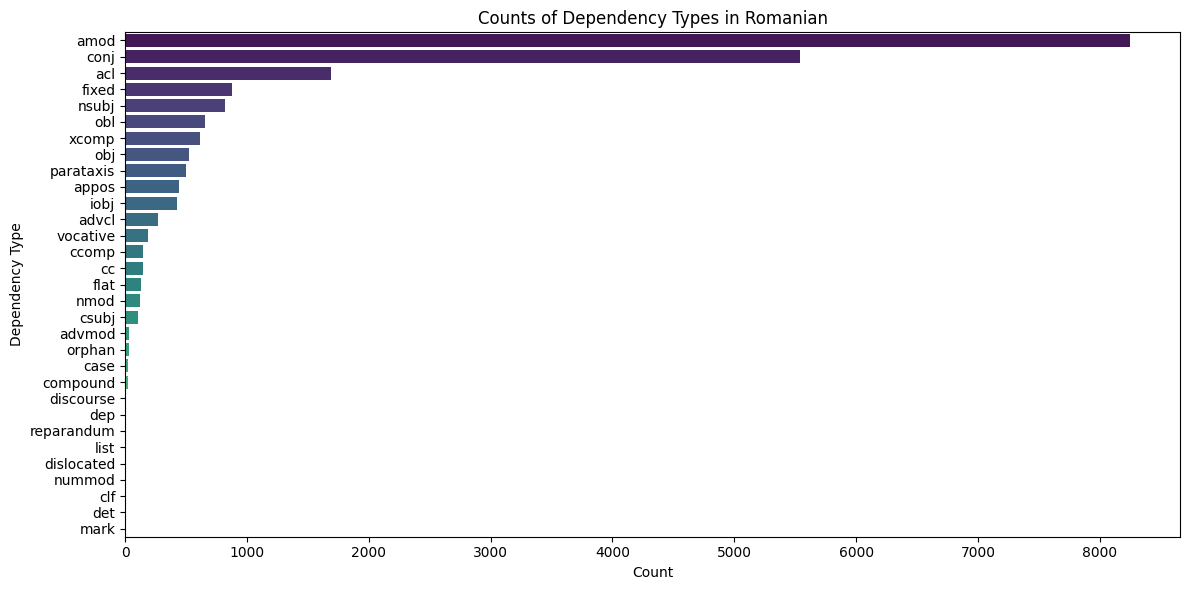

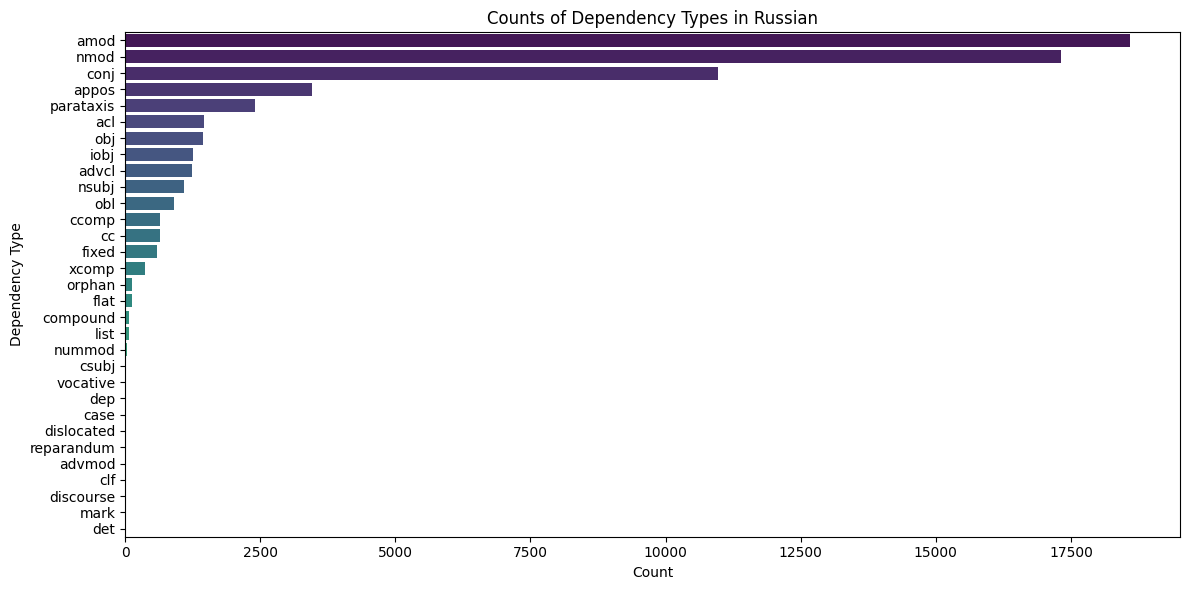

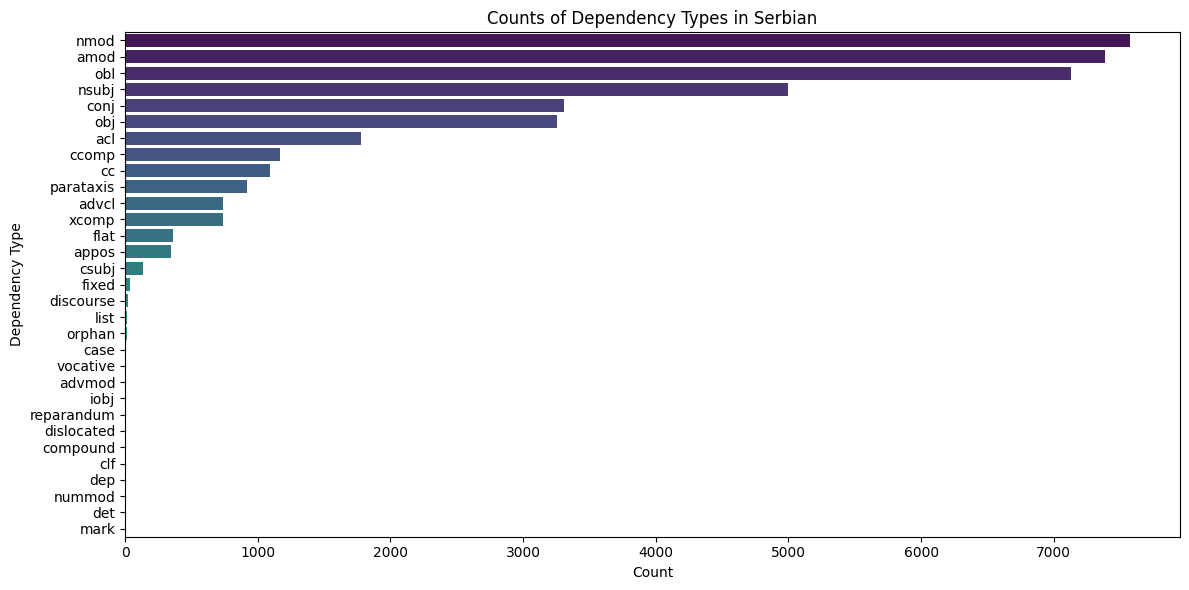

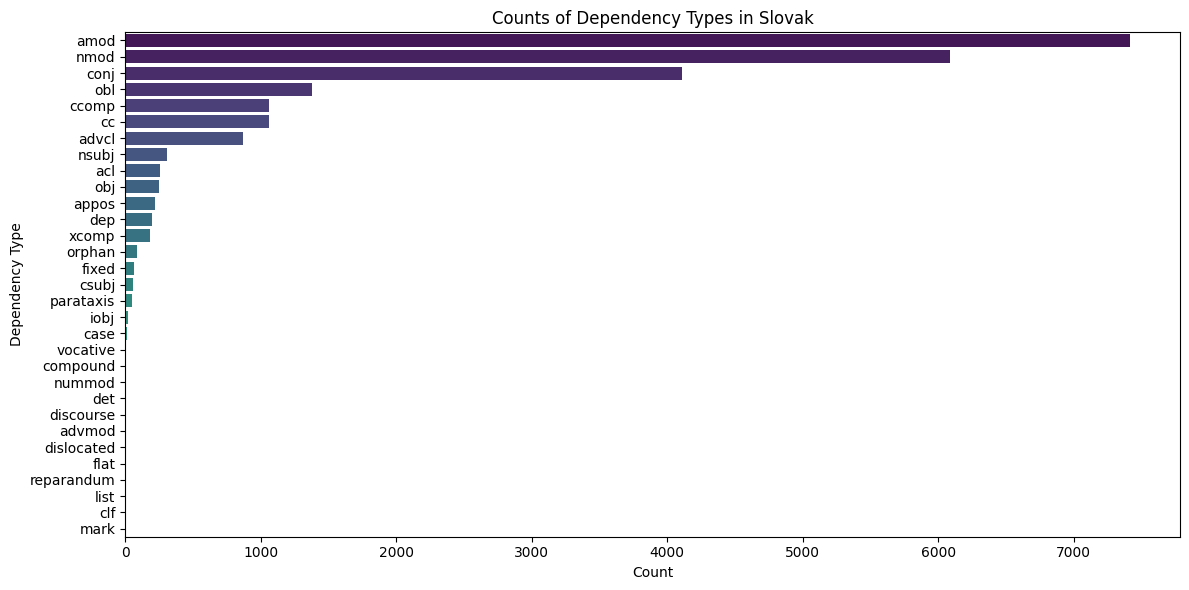

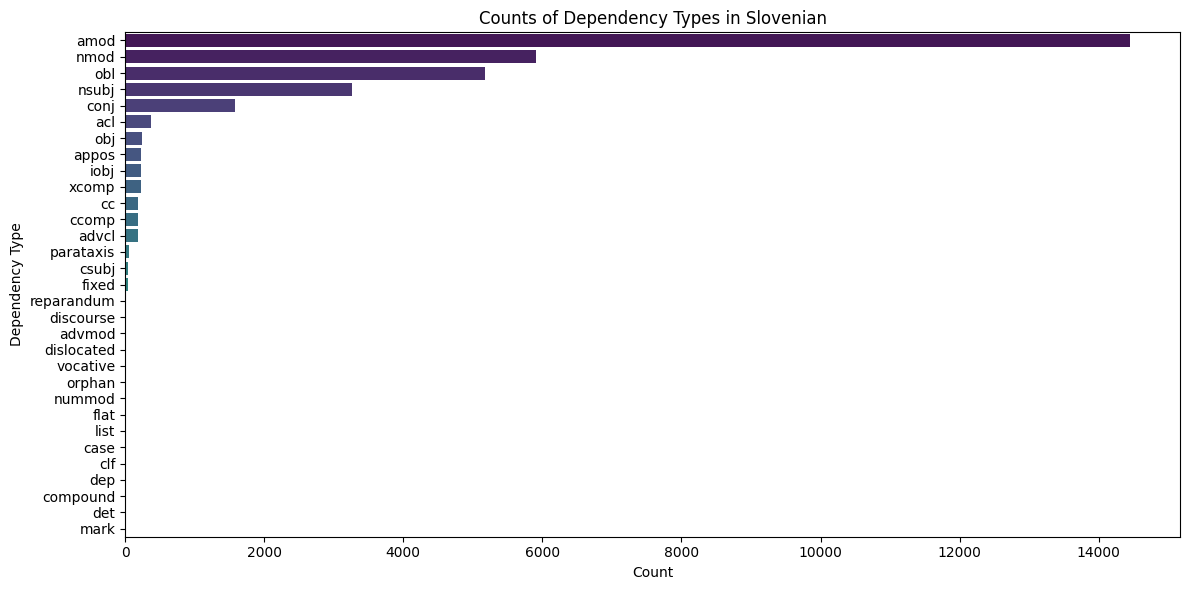

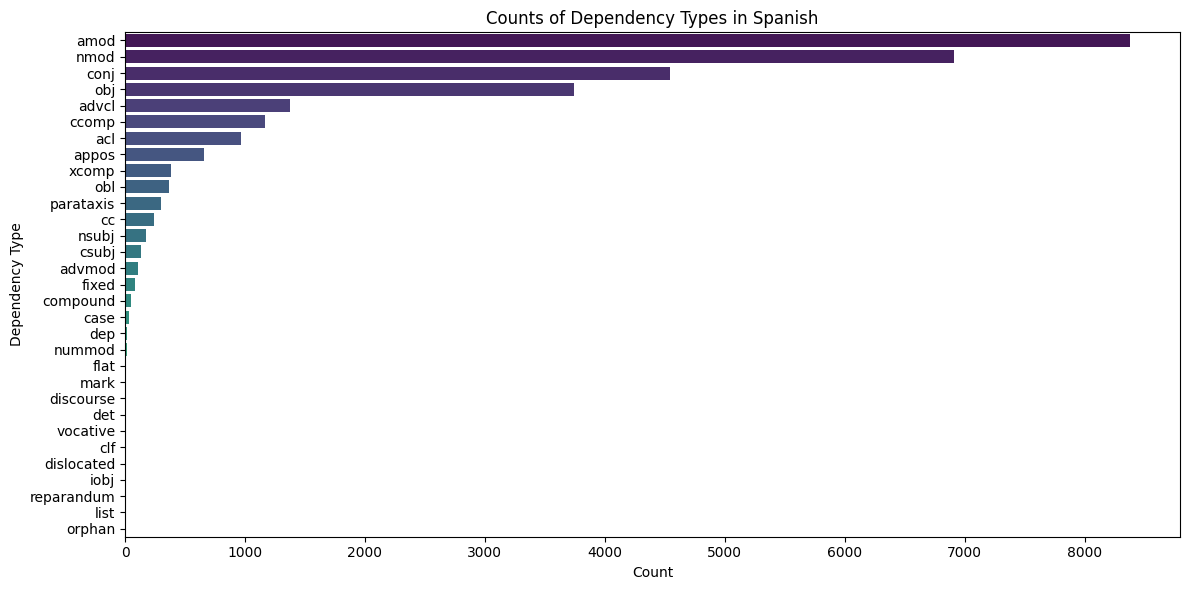

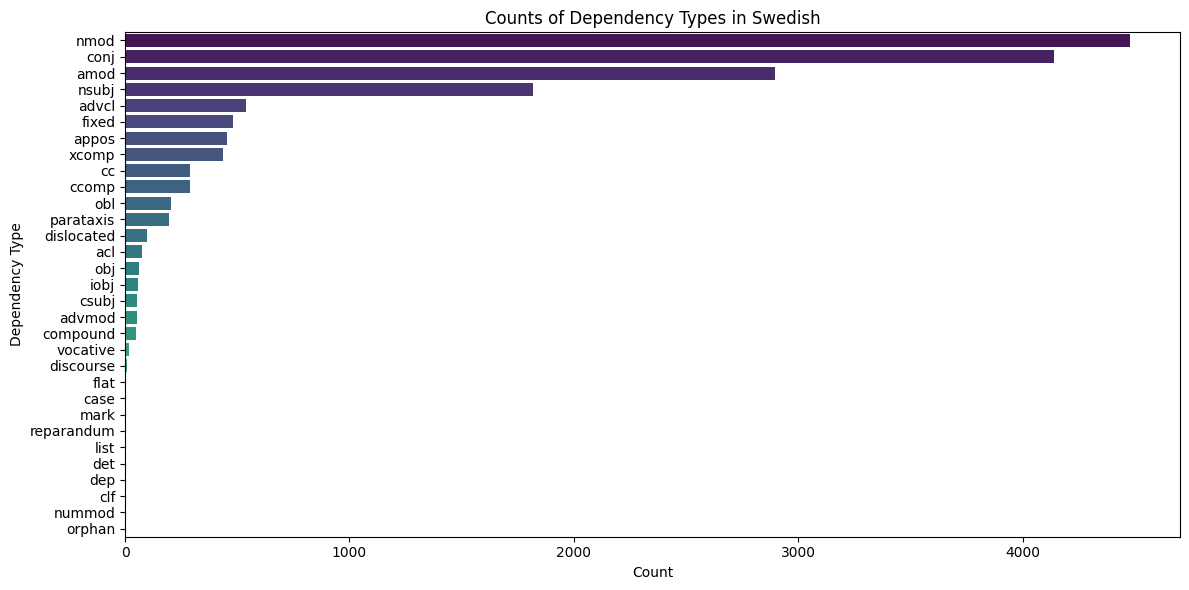

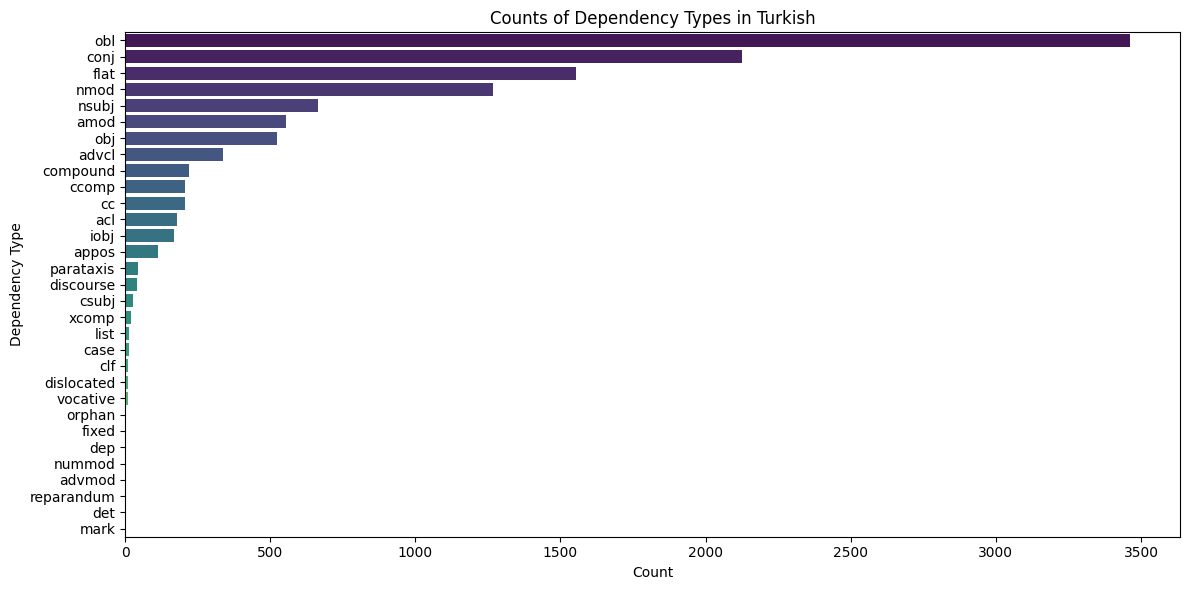

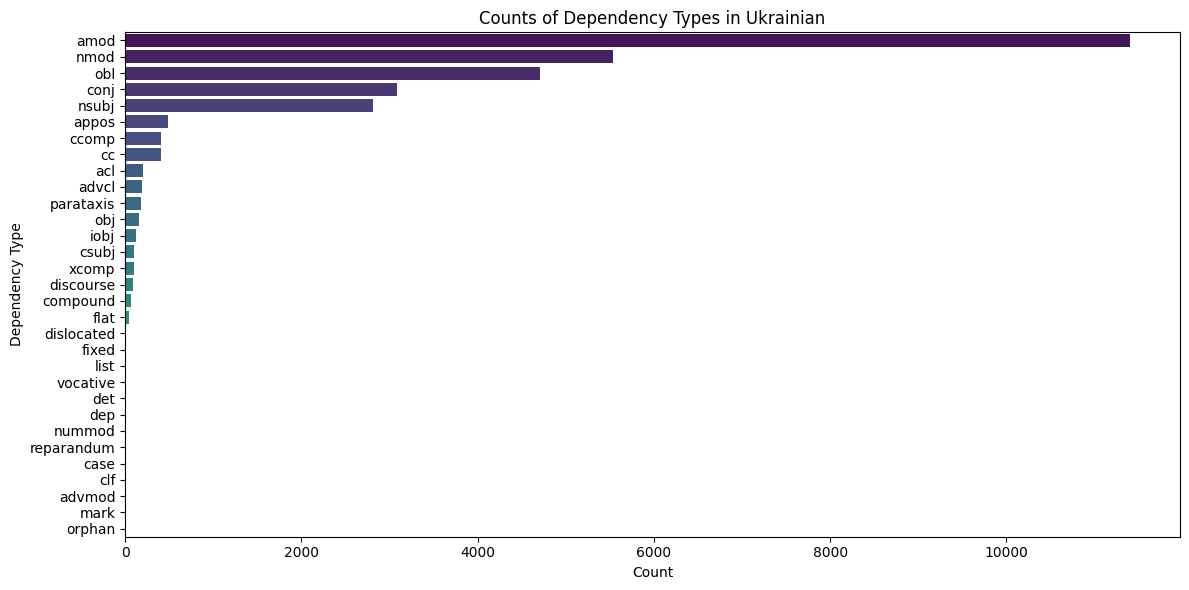

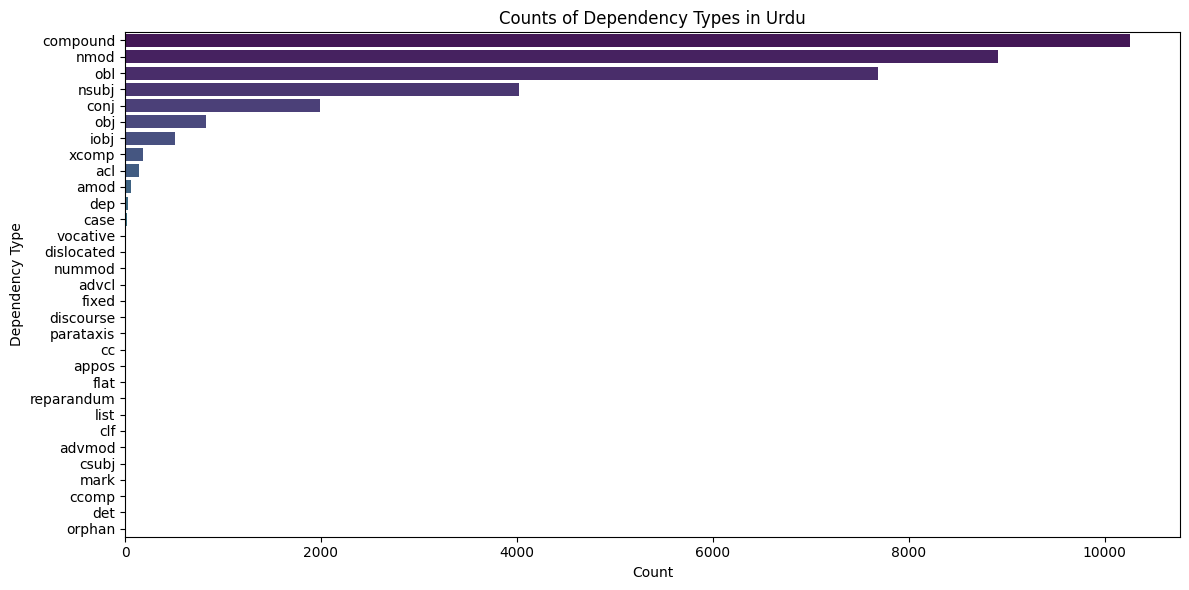

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your fixed data from the CSV file (replace 'fixed_data.csv' with your actual file)
df = pd.read_csv('fixed_data.tsv',sep='\t')
print(df)


# Overall counts of dependency types
overall_counts = df.drop(['Language', 'POS', 'File'], axis=1).sum().reset_index()
overall_counts.columns = ['Dependency Type', 'Count']

# Sort the overall counts by count in descending order
overall_counts = overall_counts.sort_values(by='Count', ascending=False)
# Convert the 'Count' column to numeric
overall_counts['Count'] = pd.to_numeric(overall_counts['Count'], errors='coerce')

# Create a bar chart for overall counts
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Dependency Type', data=overall_counts, palette='viridis')
plt.title('Overall Counts of Dependency Types')
plt.xlabel('Count')
plt.ylabel('Dependency Type')
plt.tight_layout()
plt.show()

# Counts of dependency types per language
counts_per_language = df.drop(['POS', 'File'], axis=1).groupby('Language').sum().reset_index()

# Create bar charts for counts of dependency types per language
for index, row in counts_per_language.iterrows():
    language = row['Language']
    data = row.drop(['Language'])
    data = data.reset_index()
    data.columns = ['Dependency Type', 'Count']

    # Sort the counts for the specific language by count in descending order
    data = data.sort_values(by='Count', ascending=False)

    plt.figure(figsize=(12, 6))
    sns.barplot(x='Count', y='Dependency Type', data=data, palette='viridis')
    plt.title(f'Counts of Dependency Types in {language}')
    plt.xlabel('Count')
    plt.ylabel('Dependency Type')
    plt.tight_layout()
    plt.show()


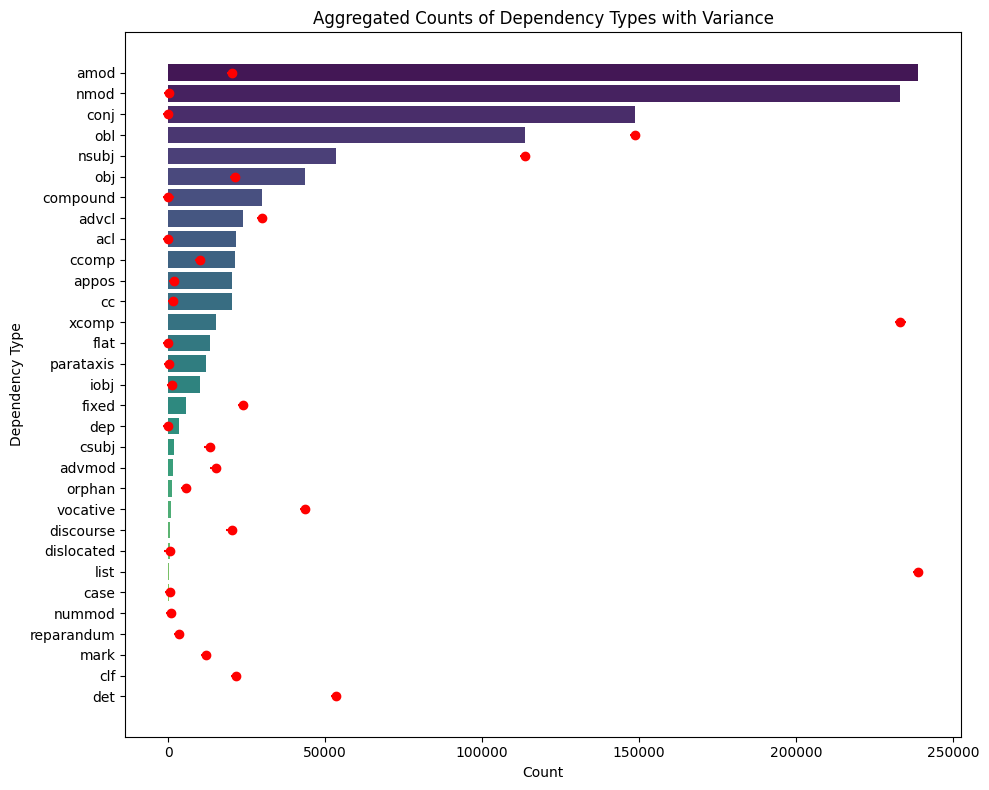

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your fixed data from the CSV file (replace 'fixed_data.csv' with your actual file)
df = pd.read_csv('fixed_data.tsv', sep='\t')

# Overall counts of dependency types
overall_counts = df.drop(['Language', 'POS', 'File'], axis=1).sum().reset_index()
overall_counts.columns = ['Dependency Type', 'Count']

# Sort the overall counts by count in descending order
overall_counts = overall_counts.sort_values(by='Count', ascending=False)

# Calculate the variance among languages for each dependency type
variance_per_dependency = df.drop(['POS', 'File'], axis=1).groupby('Language').sum().var().reset_index()
variance_per_dependency.columns = ['Language', 'Variance']

# Calculate the mean variance across languages
mean_variance = variance_per_dependency['Variance'].mean()

# Create a bar chart for overall counts with error bars representing variance
plt.figure(figsize=(10, 8))
sns.barplot(x='Count', y='Dependency Type', data=overall_counts, palette='viridis',errorbar="sd")
plt.title('Aggregated Counts of Dependency Types with Variance')
plt.xlabel('Count')
plt.ylabel('Dependency Type')

# Add error bars based on mean variance
for index, row in overall_counts.iterrows():
    dependency_type = row['Dependency Type']
    variance = mean_variance  # Use the mean variance across languages
    plt.errorbar(x=row['Count'], y=index, xerr=variance**0.5, fmt='o', color='red')

plt.tight_layout()
plt.show()
